<a href="https://colab.research.google.com/github/siim2mary/OIBSIP/blob/main/SALESPREDICTION1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project -5**

---



# **SALES PREDICTION USING PYTHON**

---



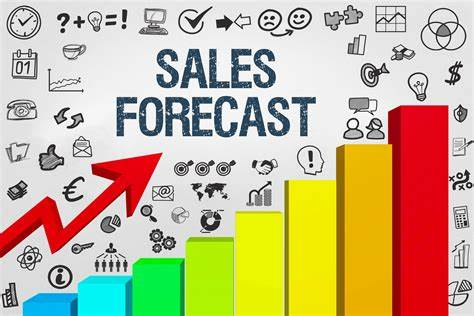

Introduction:
In the dynamic landscape of product and service-based businesses, strategic decision-making is crucial for sustained success. One pivotal aspect is the ability to forecast future sales accurately. Sales prediction involves leveraging historical data, such as advertising spend, target demographics, and advertising platforms, to anticipate consumer behavior and optimize resource allocation. In this context, data science plays a pivotal role, providing businesses with the tools to make informed predictions and maximize the impact of their advertising efforts.

Objective:
The primary objective of this project is to employ machine learning techniques to predict future sales for a product or service. By analyzing historical data encompassing factors like advertising spend, target demographics, and advertising platforms, we aim to develop a robust predictive model. The model's predictions will empower businesses to make strategic decisions regarding their advertising budgets, target audience, and promotional channels, ultimately optimizing sales performance.

Model Used:
For the initial phase of this sales prediction project, a Linear Regression model has been chosen as the primary predictive tool. Linear Regression is a foundational and interpretable model that provides insights into the linear relationships between the independent variables (advertising spend, target demographics, platform) and the dependent variable (sales). It serves as a starting point for understanding the overall trend and relationships within the data.

As the project progresses, consideration will be given to exploring more sophisticated models such as Random Forest or Gradient Boosting, especially if the data exhibits non-linear patterns or interactions between features. The choice of model will be guided by the need for accuracy and interpretability, ensuring that the final model aligns with the business's specific goals and requirements.







IMPORT NECESSARY LIBRARIES

---



In [271]:
# Importing Python Libraries for Data Processing
import os,sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing (NLP) and Text Analysis Libraries
import re
import string


# Scikit-Learn (sklearn) Libraries for Machine Learning and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Models used
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.svm import SVC

In [272]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [273]:
path_to_file1= '/content/drive/MyDrive/Advertising.csv'

In [274]:
import shutil

# Copy the file to the current working directory in Colab
shutil.copy(path_to_file1, './Advertising.csv')


'./Advertising.csv'

**IMPORT DATASET**

---



In [275]:
df = pd.read_csv("/content/Advertising.csv")

READ DATASET

---



In [276]:
df.head()

Unnamed: 0   TV    Radio  Newspaper  Sales
0       1      230.1  37.8     69.2     22.1 
1       2       44.5  39.3     45.1     10.4 
2       3       17.2  45.9     69.3      9.3 
3       4      151.5  41.3     58.5     18.5 
4       5      180.8  10.8     58.4     12.9

In [277]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [278]:
df.shape

(200, 5)

In [279]:
df.drop(columns = ['Unnamed: 0'], axis=1,inplace = True)

In [280]:
df.head()

TV    Radio  Newspaper  Sales
0  230.1  37.8     69.2     22.1 
1   44.5  39.3     45.1     10.4 
2   17.2  45.9     69.3      9.3 
3  151.5  41.3     58.5     18.5 
4  180.8  10.8     58.4     12.9

In [281]:
df.shape

(200, 4)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [283]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# **EDA**

---



In [284]:
df.describe()

TV         Radio     Newspaper     Sales  
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [285]:
# Customize the appearance using a color palette
import matplotlib.pyplot as plt
styled_summary = df.describe().T.style.background_gradient(cmap=("Set1"))

# Display the styled summary
styled_summary

In [286]:
import plotly.express as px

# Assuming df is your DataFrame
# Calculate descriptive statistics and transpose
summary = df.describe().T

# Create an interactive bar chart with Plotly Express
fig = px.bar(summary, y=summary.index, x=['mean', 'std', 'min', '25%', '50%', '75%', 'max'],
             title='Descriptive Statistics',
             labels={'value': 'Statistic', 'variable': 'Variable'},
             width=800, height=400)

# Customize layout
fig.update_layout(barmode='group', xaxis=dict(title='Value'))

# Show the interactive plot
fig.show()


**Check for  Null Values**

---



In [287]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [288]:
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

There are no Null Values

In [289]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no Nan values

**Check for duplicates**

---



In [290]:
df.duplicated().sum()

0

There are no duplicates

<Axes: >

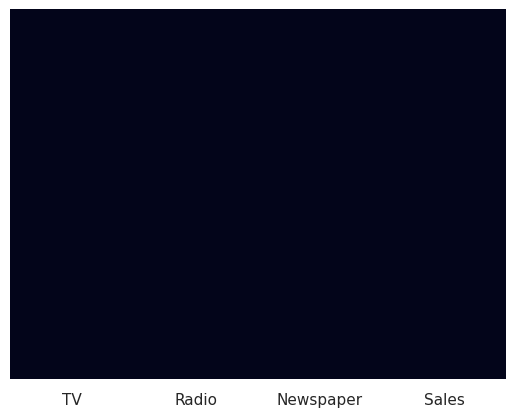

In [291]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False)

In [292]:
import missingno as msno

Text(0.5, 1.0, 'Missing Data for Advertising sales prediction dataset')

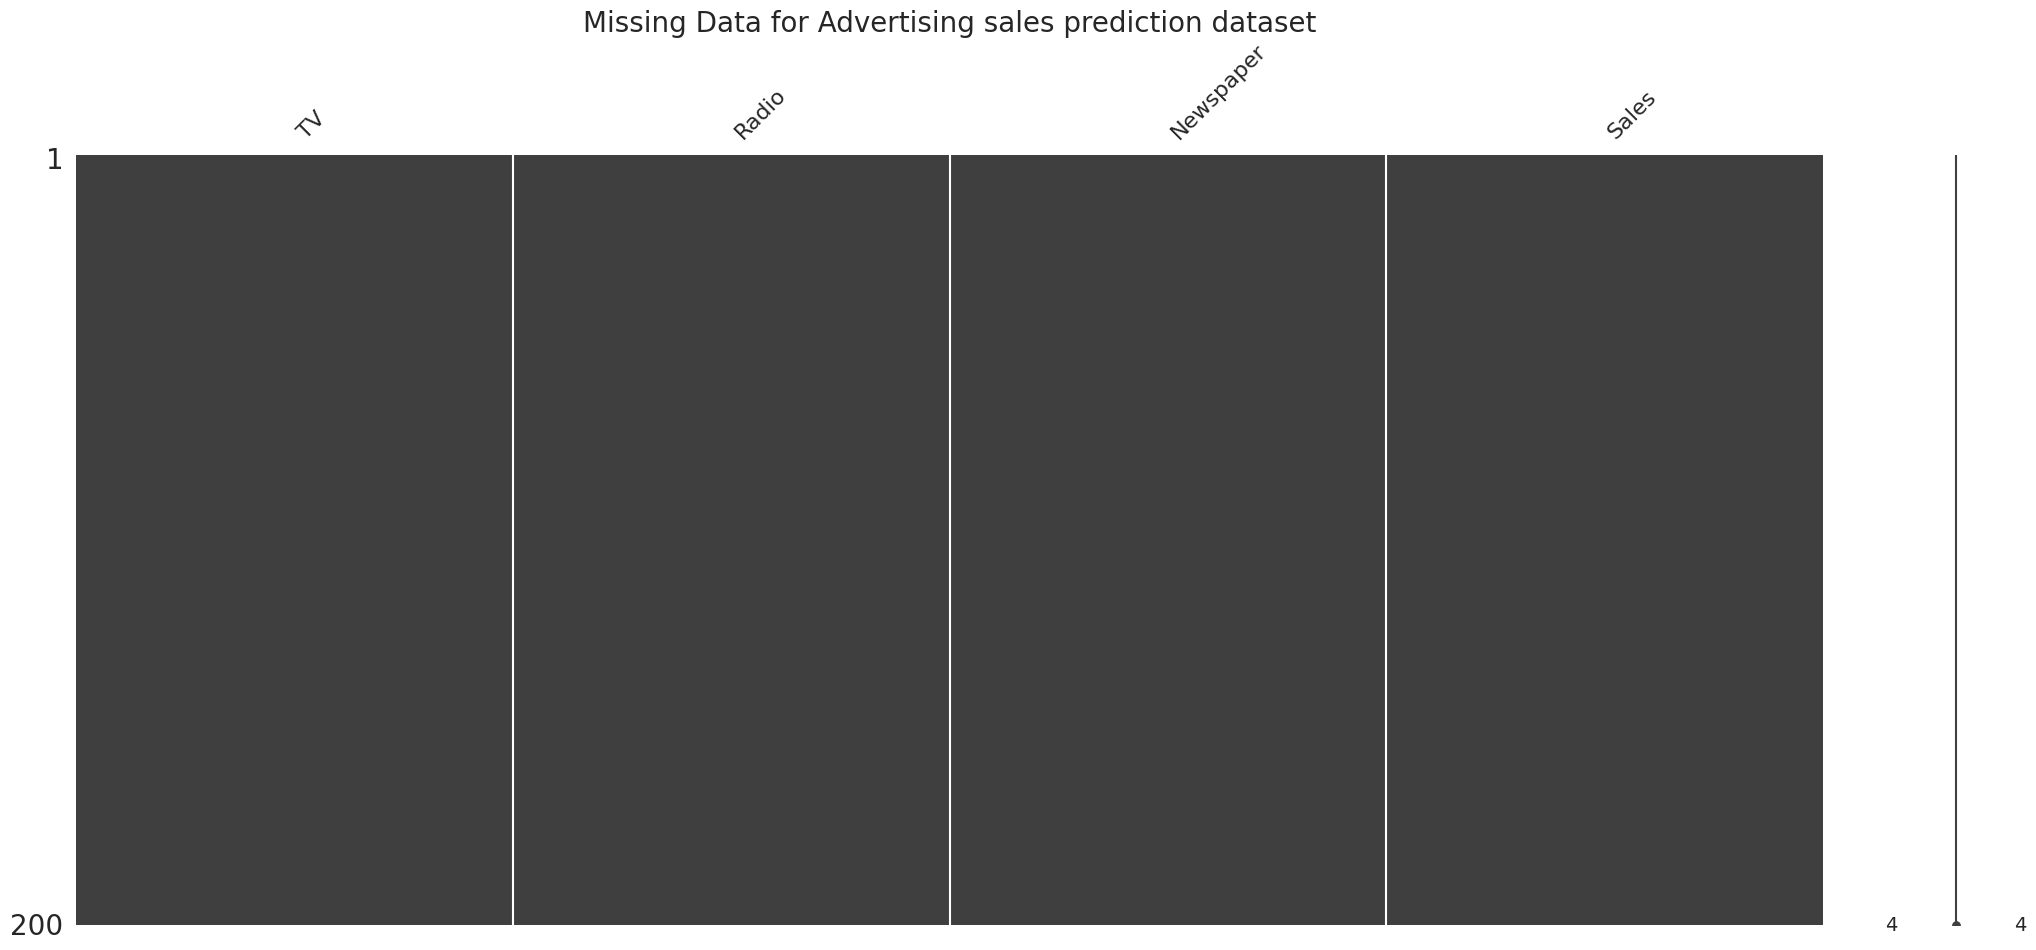

In [293]:
missing = msno.matrix(df)
missing.set_title("Missing Data for Advertising sales prediction dataset", fontsize=20)

In [294]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.imshow(df.isnull(), color_continuous_scale='Viridis')
fig.update_layout(title='Missing Data Heatmap')
fig.show()


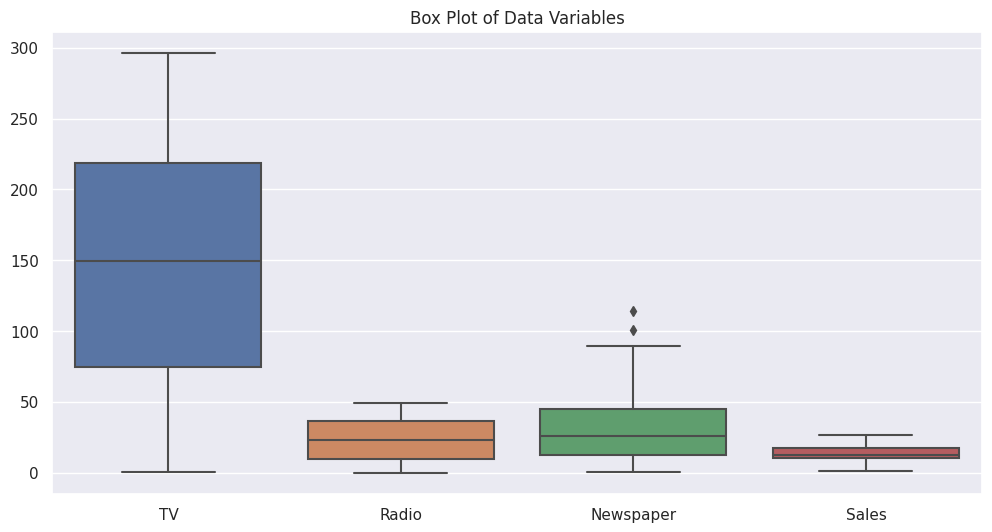

In [295]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Data Variables')
plt.show()


There are outliers in Newspaper

<Figure size 1200x600 with 0 Axes>

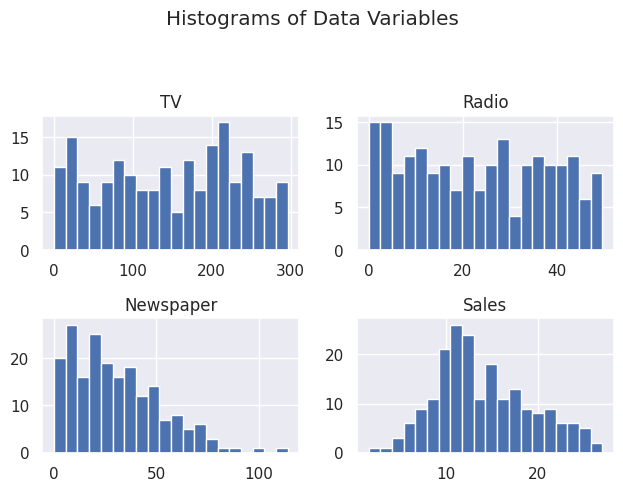

In [296]:
plt.figure(figsize=(12, 6))
df.hist(bins=20)
plt.suptitle('Histograms of Data Variables', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


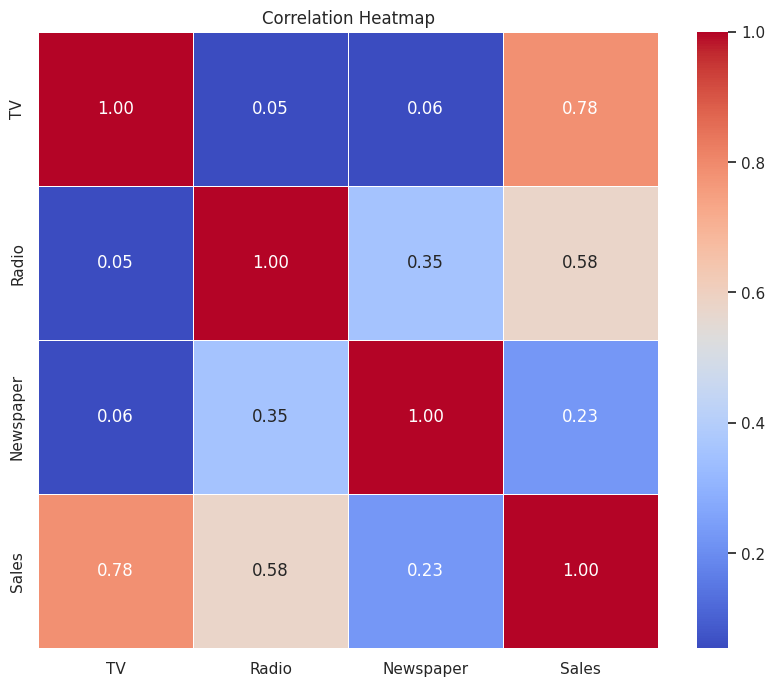

In [297]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


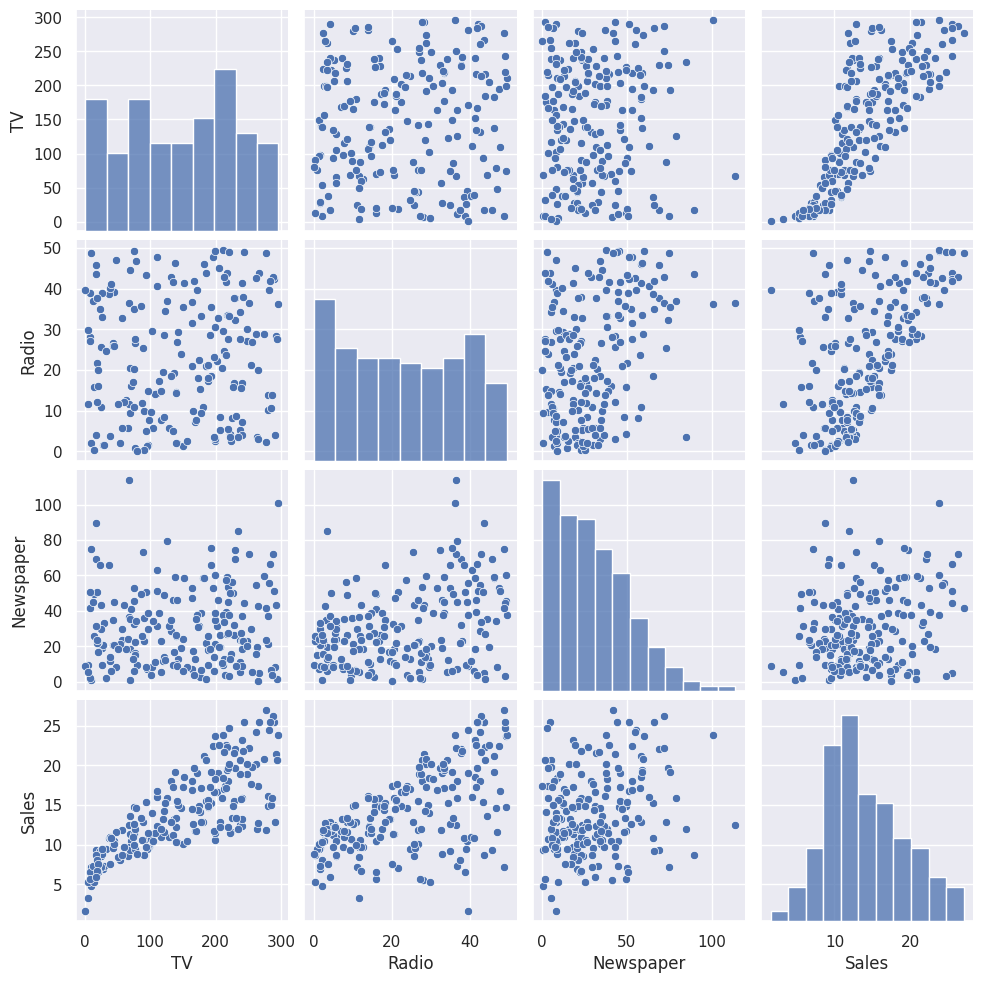

In [298]:
import seaborn as sns
sns.pairplot(df)
plt.show()


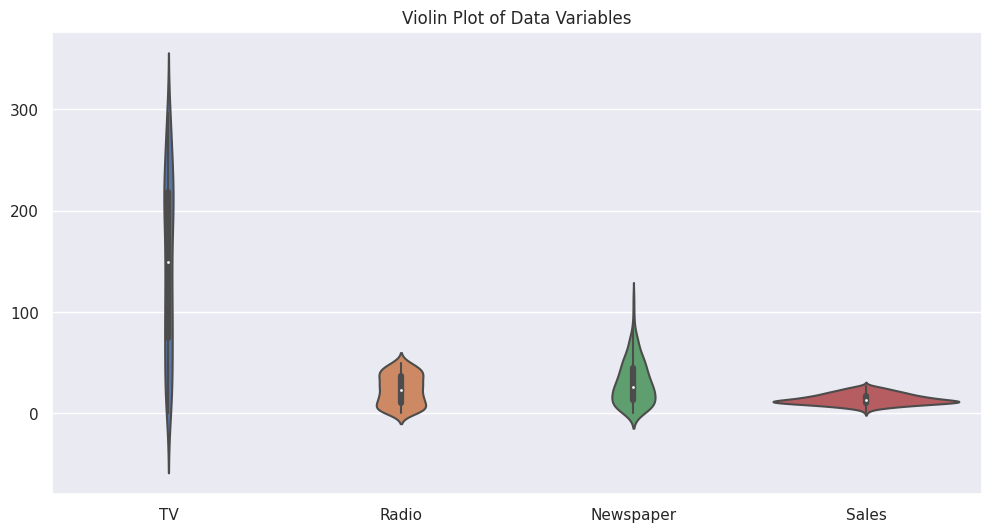

In [299]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.title('Violin Plot of Data Variables')
plt.show()


**Check for Outliers**

---



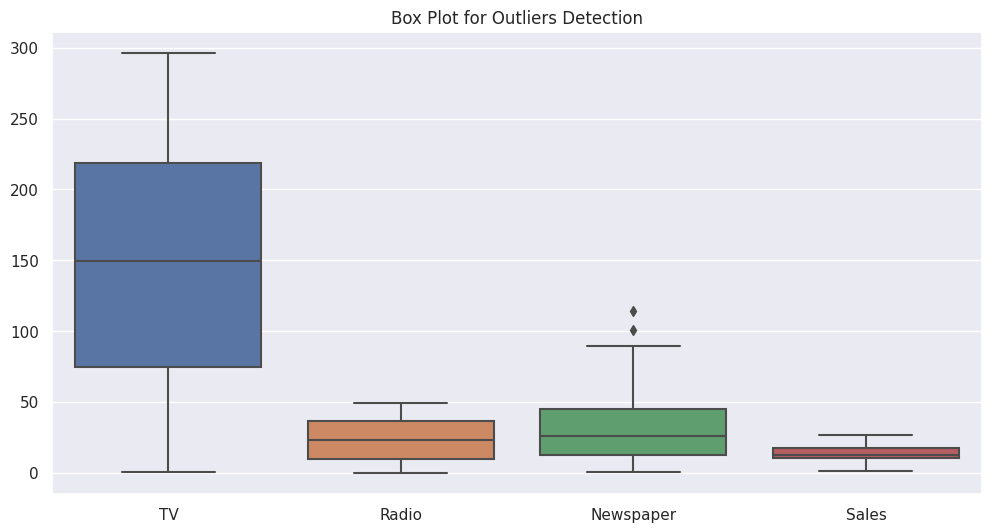

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot for Outliers Detection')
plt.show()


There are outliers in Newspaper

In [301]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.box(df, title='Box Plot for Outliers Detection')
fig.update_layout(title_text='Box Plot for Outliers Detection')
fig.show()


# **OUTLIER TREATMENT -REMOVING OUTLIERS USING IQR**

---



In [302]:
# Assuming df is your DataFrame and 'Newspaper' is the variable of interest
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Set the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the bounds
outliers = (df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)

# Create a new DataFrame without outliers
df = df[~outliers]


In [303]:
df.head()

TV    Radio  Newspaper  Sales
0  230.1  37.8     69.2     22.1 
1   44.5  39.3     45.1     10.4 
2   17.2  45.9     69.3      9.3 
3  151.5  41.3     58.5     18.5 
4  180.8  10.8     58.4     12.9

In [304]:
import plotly.express as px

# Assuming df_no_outliers is your DataFrame without outliers
fig = px.box(df, title='Box Plot without Outliers')
fig.update_layout(title_text='Box Plot without Outliers')
fig.show()


Now all outliers are removed.

The IQR (Interquartile Range) method is a robust statistical technique for identifying outliers in a dataset. It involves calculating the spread of the middle 50% of the data, which is defined by the interquartile range. Outliers are then identified as data points falling below the lower bound or above the upper bound, which are set at a certain distance from the quartiles.
Compute the first quartile (Q1) and the third quartile (Q3) for the target variable ('Newspaper' in this case).
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)

Calculate IQR:

Find the interquartile range (IQR) by subtracting Q1 from Q3.
IQR = Q3 - Q1

Set Bounds:

Establish lower and upper bounds to identify potential outliers.
python
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Identify Outliers:

Create a boolean mask to mark data points that fall outside the defined bounds.
outliers = (df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)



In [305]:
for i in df:
  print("*************************************",i,
        "**************************************")
  print()
  print(set(df[i].tolist()))
  print()

************************************* TV **************************************

{0.7, 4.1, 5.4, 7.3, 8.7, 8.6, 7.8, 8.4, 11.7, 13.2, 13.1, 16.9, 17.2, 18.8, 19.4, 17.9, 19.6, 18.7, 23.8, 25.1, 26.8, 27.5, 28.6, 25.0, 25.6, 31.5, 36.9, 38.0, 39.5, 38.2, 43.1, 44.5, 43.0, 44.7, 48.3, 50.0, 53.5, 56.2, 57.5, 215.4, 59.6, 62.3, 66.1, 66.9, 68.4, 69.2, 70.6, 69.0, 73.4, 74.7, 75.3, 76.4, 76.3, 78.2, 75.1, 80.2, 75.5, 85.7, 87.2, 88.3, 89.7, 90.4, 93.9, 94.2, 95.7, 96.2, 97.5, 97.2, 100.4, 102.7, 104.6, 107.4, 109.8, 110.7, 112.9, 116.0, 117.2, 120.5, 120.2, 121.0, 123.1, 125.7, 129.4, 131.1, 131.7, 134.3, 135.2, 136.2, 137.9, 139.3, 139.2, 141.3, 142.9, 140.3, 139.5, 147.3, 149.8, 149.7, 151.5, 156.6, 163.3, 163.5, 164.5, 165.6, 166.8, 168.4, 170.2, 171.3, 172.5, 175.1, 175.7, 177.0, 180.8, 182.6, 184.9, 187.9, 187.8, 188.4, 191.1, 193.2, 193.7, 195.4, 197.6, 198.9, 199.8, 199.1, 202.5, 204.1, 205.0, 206.9, 206.8, 209.6, 210.8, 210.7, 213.4, 214.7, 213.5, 216.4, 216.8, 218.4, 217.7, 220.3,

In [306]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [307]:
df.tail()

TV    Radio  Newspaper  Sales
195   38.2   3.7     13.8      7.6 
196   94.2   4.9      8.1      9.7 
197  177.0   9.3      6.4     12.8 
198  283.6  42.0     66.2     25.5 
199  232.1   8.6      8.7     13.4

In [308]:
# Assuming df is your DataFrame
import plotly.express as px

# Calculate the sum of values for each column
sum_values = df[['TV', 'Radio', 'Newspaper']].sum()

# Create a pie chart using Plotly Express
fig = px.pie(names=sum_values.index, values=sum_values.values, title='Distribution of TV, Radio, Newspaper')
fig.show()


In [309]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.sunburst(df, path=['TV', 'Radio', 'Newspaper'], values='Sales',
                  title='Sunburst Plot of Sales for TV, Radio, and Newspaper')

# Show the plot
fig.show()


**DATA VISUALISATION**

---



In [310]:
!pip install pydantic typing-extensions


In [311]:
# install the dtale package
!pip install dtale
# load the dtale
import dtale
# use show
dtale.show(df)

http://955a4e6b0d50:40000/dtale/main/1

In [312]:
# install the sweetviz package
!pip install sweetviz
# load the sweetviz
import sweetviz
# use analyze
analyze_df = sweetviz.analyze([df, "df"], target_feat = 'Sales')
# then show
analyze_df.show_html('analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Shape of your Data Set loaded: (198, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables 

Number of All Scatter Plots = 10


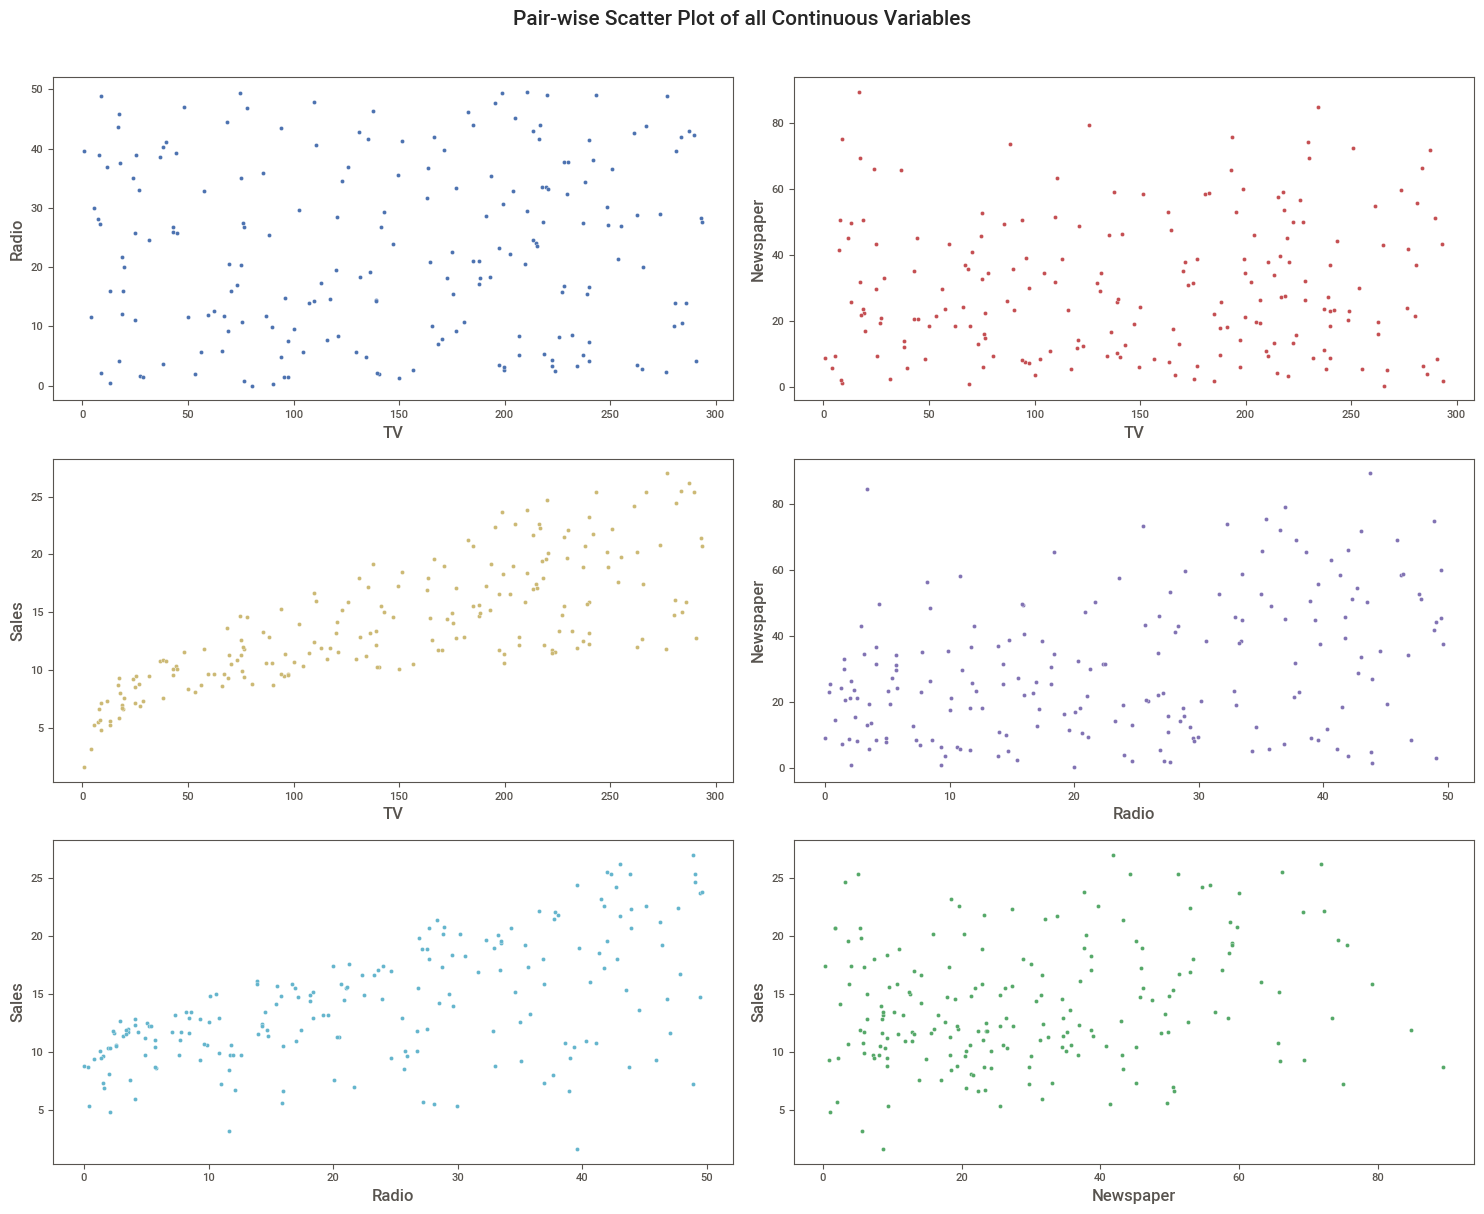

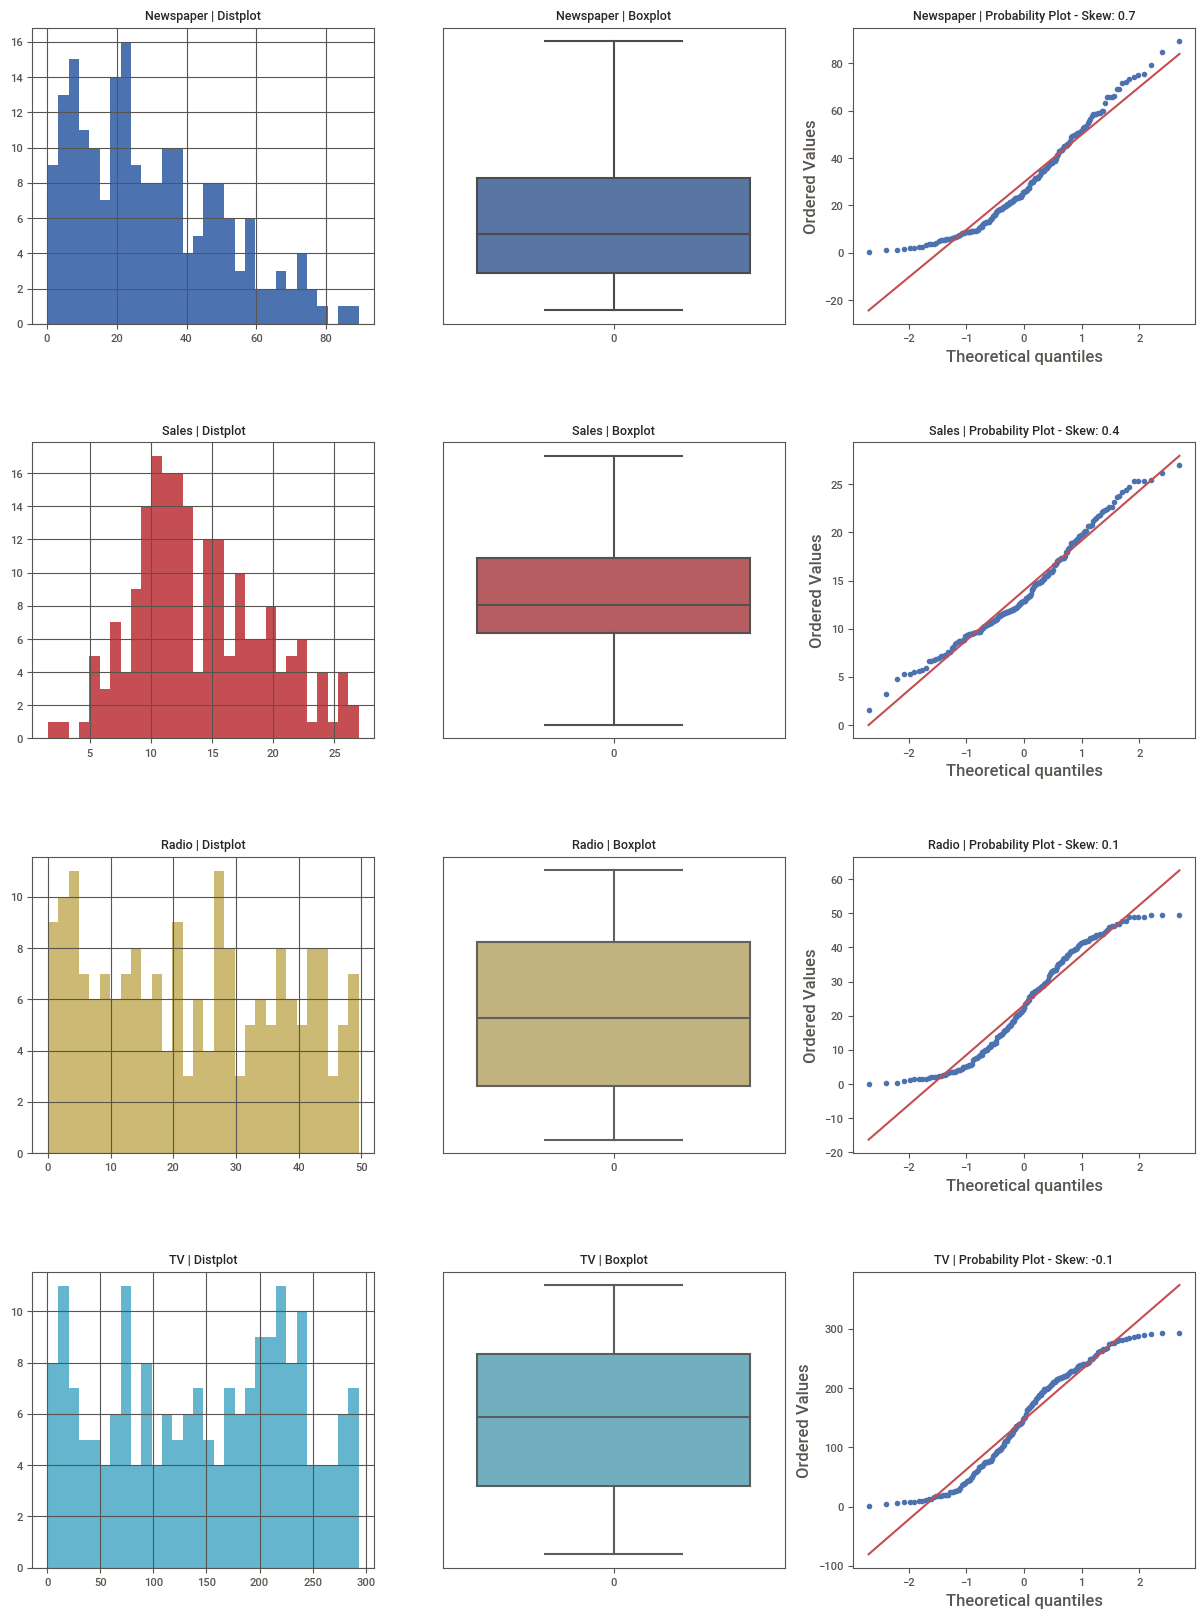

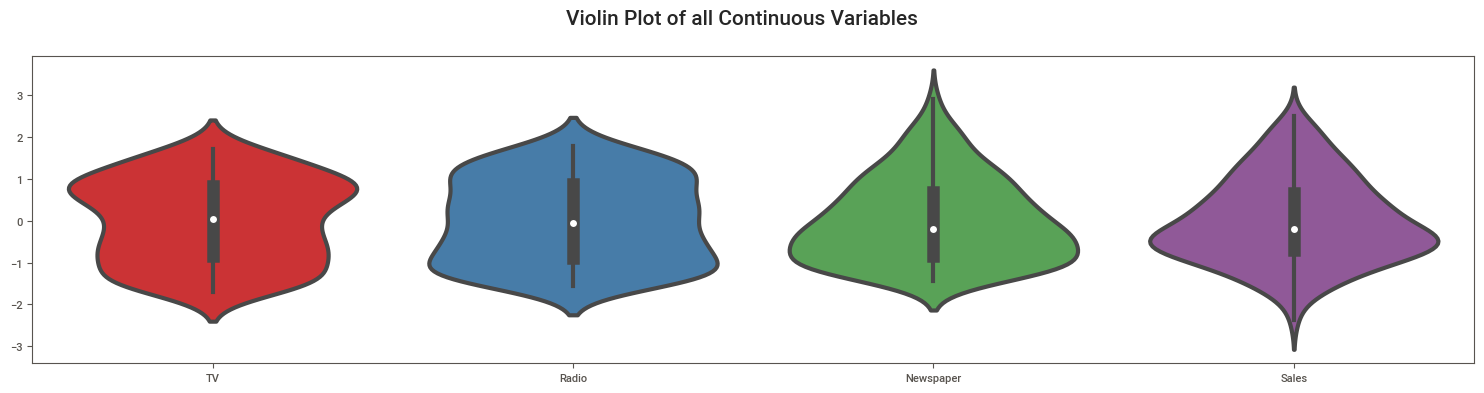

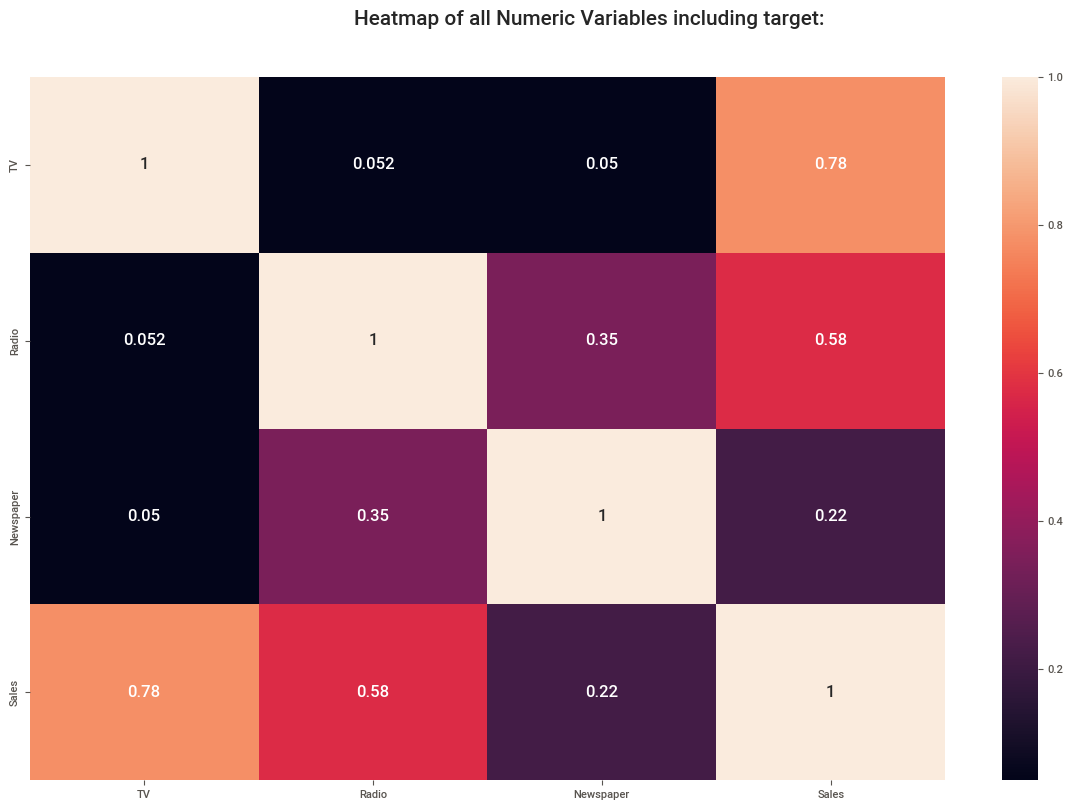

All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [313]:
# Install the autoviz package
!pip install autoviz

# Load the autoviz
from autoviz.AutoViz_Class import AutoViz_Class

# Create an instance of AutoViz_Class
av = AutoViz_Class()

# Produce AutoViz visualization of df
report = av.AutoViz(
    filename="",
    sep=",",
    depVar="",
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",  # Use "svg" for Jupyter notebooks
    max_rows_analyzed=10000,
    max_cols_analyzed=10,
    save_plot_dir=None
)


# **DISTRIBUTION OF SALES**

---



In [314]:
# Assuming df is your DataFrame
import plotly.express as px

# Create a histogram for the 'Sales' variable
fig = px.histogram(df, x='Sales', nbins=30, title='Distribution of Sales')
fig.show()


In [315]:
# Assuming df is your DataFrame
import plotly.express as px

# Create a colored plot for the distribution of 'Sales'
fig = px.histogram(df, x='Sales', color='Sales', nbins=30, marginal='rug', title='Distribution of Sales')
fig.show()


In [316]:
# Assuming df is your DataFrame
import plotly.express as px

# Melt the DataFrame to create a long-format DataFrame
df_melted = pd.melt(df, id_vars='Sales', value_vars=['TV', 'Radio', 'Newspaper'], var_name='Commodity')

# Create a bar chart for each commodity with Sales
fig = px.bar(df_melted, x='Sales', color='Sales', facet_col='Commodity', facet_col_wrap=1, title='Count Plot for Each Commodity with Sales')
fig.update_layout(height=400, showlegend=False)
fig.show()


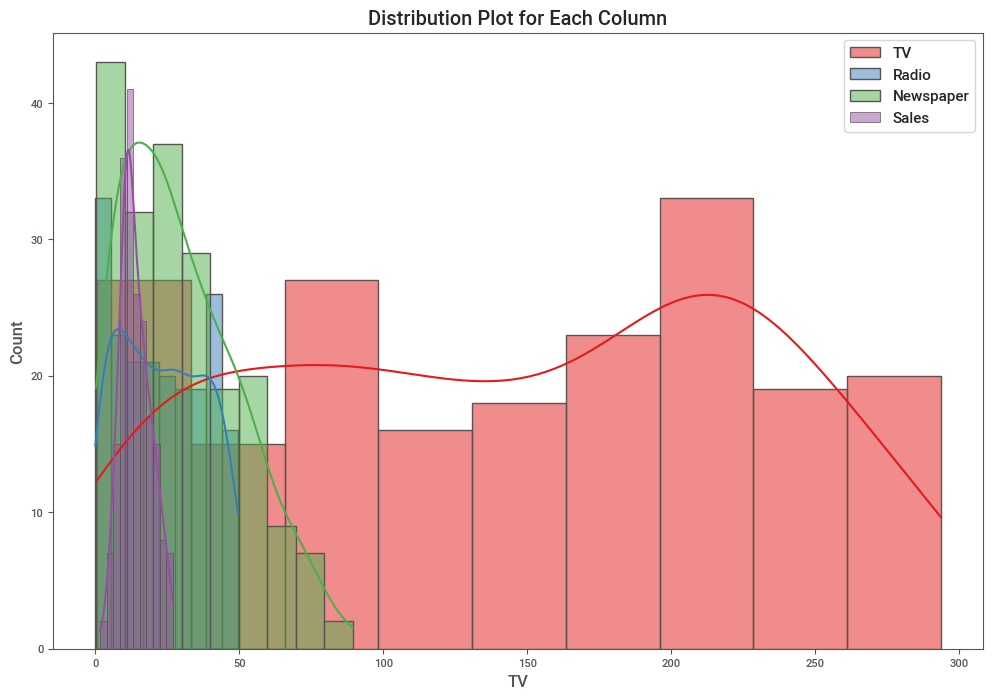

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Iterate through each column and create a distribution plot
for column in df.columns:
    sns.histplot(df[column], kde=True, label=column)

plt.title('Distribution Plot for Each Column')
plt.legend()
plt.show()


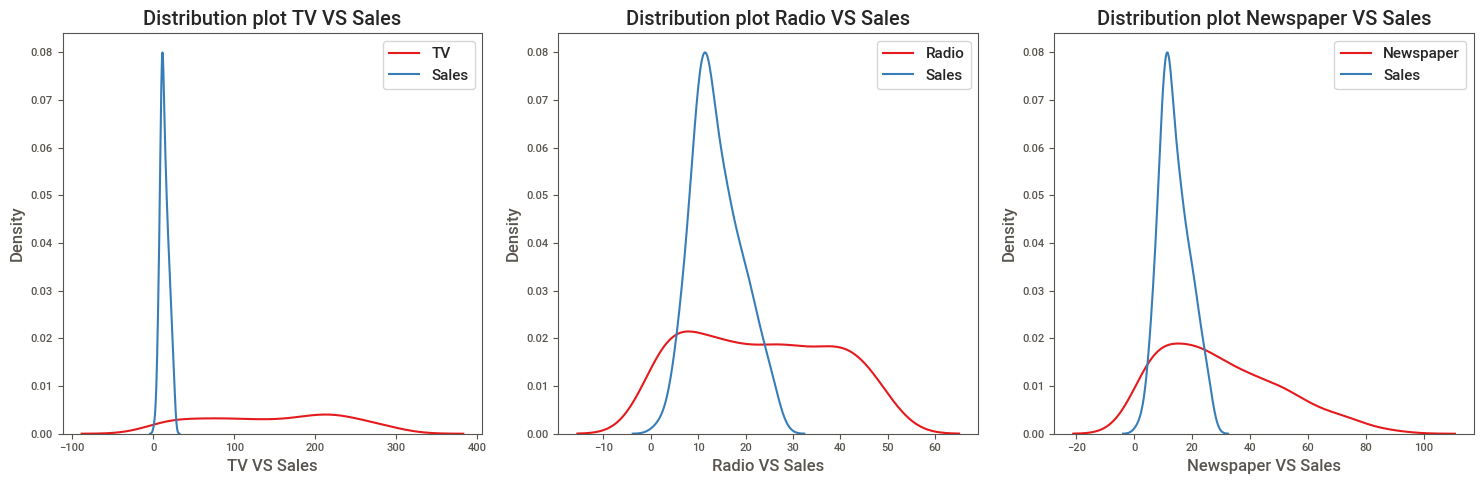

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

columns = ["TV", "Radio", "Newspaper"]

for i, col_name in enumerate(columns):
    plt.subplot(1, 3, i + 1)
    sns.distplot(df[col_name], hist=False, label=col_name)
    sns.distplot(df["Sales"], hist=False, label="Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


In [319]:
# Assuming df is your DataFrame
import plotly.express as px

# Melt the DataFrame to create a long-format DataFrame
df_melted = pd.melt(df, var_name='Column', value_name='Value')

# Create a distribution plot for each column
fig = px.histogram(df_melted, x='Value', color='Column', marginal='rug',
                   title='Distribution Plot for Each Column')
fig.show()


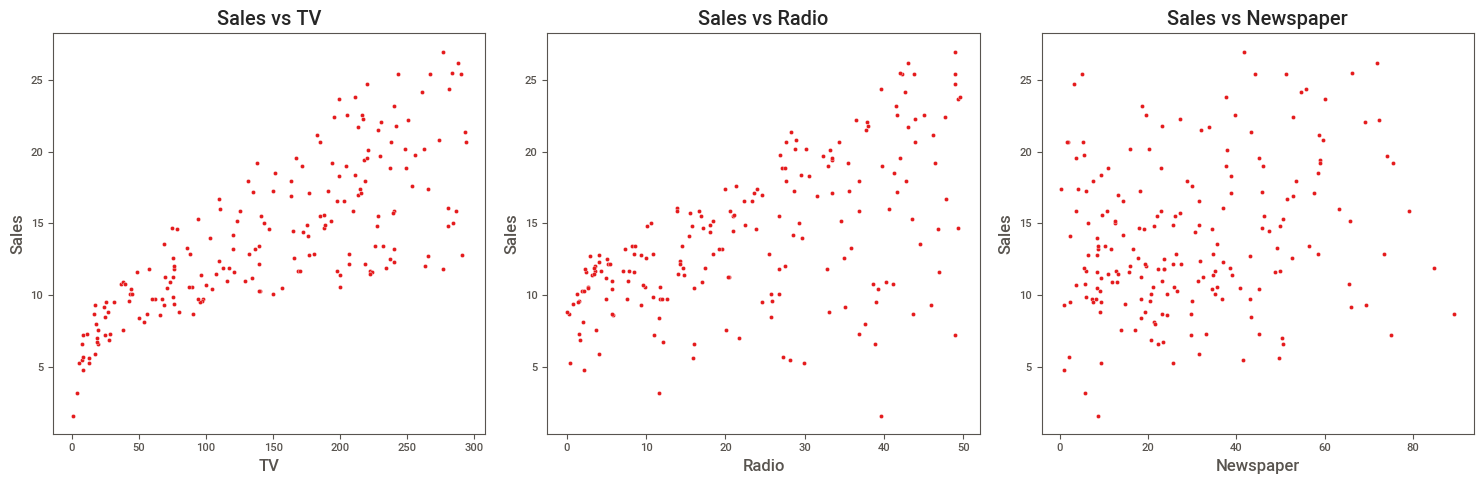

In [320]:
# Assuming df is your DataFrame
plt.figure(figsize=(15, 5))

# Scatter plot for Sales and TV
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Sales vs TV')

# Scatter plot for Sales and Radio
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Sales vs Radio')

# Scatter plot for Sales and Newspaper
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Sales vs Newspaper')

plt.tight_layout()
plt.show()


In [321]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.scatter(df, x='TV', y='Sales', title='Sales vs TV')
fig.show()

fig = px.scatter(df, x='Radio', y='Sales', title='Sales vs Radio')
fig.show()

fig = px.scatter(df, x='Newspaper', y='Sales', title='Sales vs Newspaper')
fig.show()


Count of items and Sales

---



In [322]:
# Assuming df is your DataFrame
count_sales_df = df.groupby(['TV', 'Radio', 'Newspaper']).size().reset_index(name='Count')

# Display the DataFrame
count_sales_df


TV    Radio  Newspaper  Count
0      0.7  39.6      8.7       1  
1      4.1  11.6      5.7       1  
2      5.4  29.9      9.4       1  
3      7.3  28.1     41.4       1  
4      7.8  38.9     50.6       1  
5      8.4  27.2      2.1       1  
6      8.6   2.1      1.0       1  
7      8.7  48.9     75.0       1  
8     11.7  36.9     45.2       1  
9     13.1   0.4     25.6       1  
10    13.2  15.9     49.6       1  
11    16.9  43.7     89.4       1  
12    17.2   4.1     31.6       1  
13    17.2  45.9     69.3       1  
14    17.9  37.6     21.6       1  
15    18.7  12.1     23.4       1  
16    18.8  21.7     50.4       1  
17    19.4  16.0     22.3       1  
18    19.6  20.1     17.0       1  
19    23.8  35.1     65.9       1  
20    25.0  11.0     29.7       1  
21    25.1  25.7     43.3       1  
22    25.6  39.0      9.3       1  
23    26.8  33.0     19.3       1  
24    27.5   1.6     20.7       1  
25    28.6   1.5     33.0       1  
26    31.5  24.6      2.2       1  
27    36.9  38.6     65.6       1  
28    38.0  40.3     11.9       1  
29    38.2   3.7     13.8       1  
30    39.5  41.1      5.8       1  
31    43.0  25.9     20.5       1  
32    43.1  26.7     35.1       1  
33    44.5  39.3     45.1       1  
34    44.7  25.8     20.6       1  
35    48.3  47.0      8.5       1  
36    50.0  11.6     18.4       1  
37    53.5   2.0     21.4       1  
38    56.2   5.7     29.7       1  
39    57.5  32.8     23.5       1  
40    59.6  12.0     43.1       1  
41    62.3  12.6     18.3       1  
42    66.1   5.8     24.2       1  
43    66.9  11.7     36.8       1  
44    68.4  44.5     35.6       1  
45    69.0   9.3      0.9       1  
46    69.2  20.5     18.3       1  
47    70.6  16.0     40.8       1  
48    73.4  17.0     12.9       1  
49    74.7  49.4     45.7       1  
50    75.1  35.0     52.7       1  
51    75.3  20.3     32.5       1  
52    75.5  10.8      6.0       1  
53    76.3  27.5     16.0       1  
54    76.4   0.8     14.8       1  
55    76.4  26.7     22.3       1  
56    78.2  46.8     34.5       1  
57    80.2   0.0      9.2       1  
58    85.7  35.8     49.3       1  
59    87.2  11.8     25.9       1  
60    88.3  25.5     73.4       1  
61    89.7   9.9     35.7       1  
62    90.4   0.3     23.2       1  
63    93.9  43.5     50.5       1  
64    94.2   4.9      8.1       1  
65    95.7   1.4      7.4       1  
66    96.2  14.8     38.9       1  
67    97.2   1.5     30.0       1  
68    97.5   7.6      7.2       1  
69   100.4   9.6      3.6       1  
70   102.7  29.6      8.4       1  
71   104.6   5.7     34.4       1  
72   107.4  14.0     10.9       1  
73   109.8  14.3     31.7       1  
74   109.8  47.8     51.4       1  
75   110.7  40.6     63.2       1  
76   112.9  17.4     38.6       1  
77   116.0   7.7     23.1       1  
78   117.2  14.7      5.4       1  
79   120.2  19.6     11.6       1  
80   120.5  28.5     14.2       1  
81   121.0   8.4     48.7       1  
82   123.1  34.6     12.4       1  
83   125.7  36.9     79.2       1  
84   129.4   5.7     31.3       1  
85   131.1  42.8     28.9       1  
86   131.7  18.4     34.6       1  
87   134.3   4.9      9.3       1  
88   135.2  41.7     45.9       1  
89   136.2  19.2     16.6       1  
90   137.9  46.4     59.0       1  
91   139.2  14.3     25.6       1  
92   139.3  14.5     10.2       1  
93   139.5   2.1     26.6       1  
94   140.3   1.9      9.0       1  
95   141.3  26.8     46.2       1  
96   142.9  29.3     12.6       1  
97   147.3  23.9     19.1       1  
98   149.7  35.6      6.0       1  
99   149.8   1.3     24.3       1  
100  151.5  41.3     58.5       1  
101  156.6   2.6      8.3       1  
102  163.3  31.6     52.9       1  
103  163.5  36.8      7.4       1  
104  164.5  20.9     47.4       1  
105  165.6  10.0     17.6       1  
106  166.8  42.0      3.6       1  
107  168.4   7.1     12.8       1  
108  170.2   7.8     35.2       1  
109  171.3  39.7     37.7       1  
110  172.5

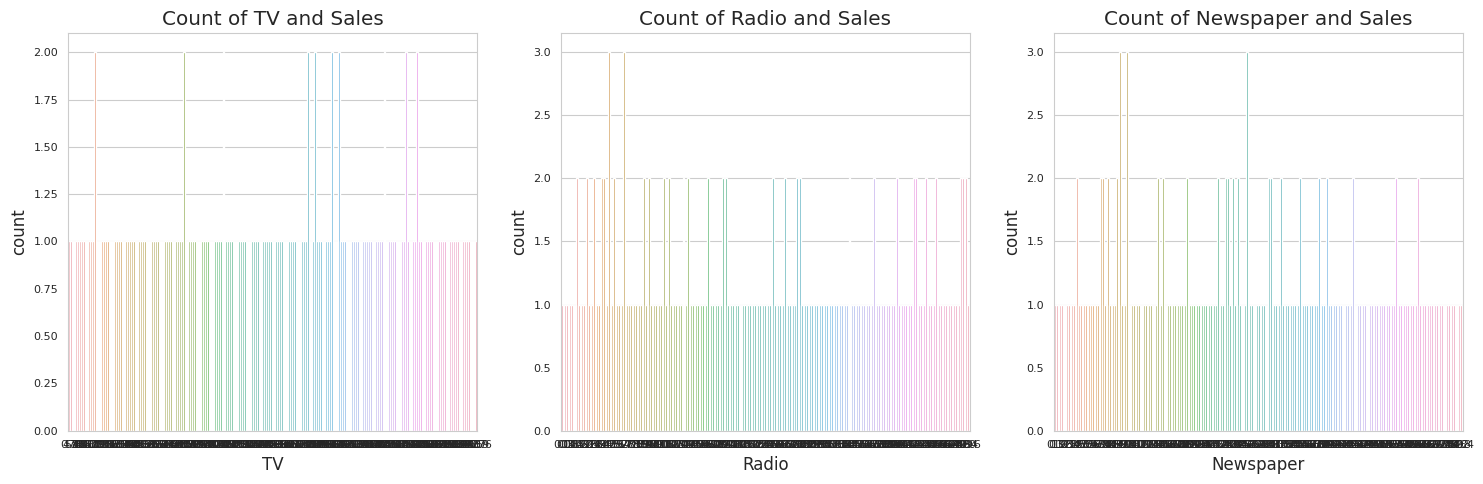

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a color palette for better visibility
sns.set_palette("pastel")

# Set the style for a white background with grid lines
sns.set_style("whitegrid")

# Assuming count_sales_df is your DataFrame
plt.figure(figsize=(15, 5))

# Bar plot for counts of TV
plt.subplot(1, 3, 1)
sns.countplot(x='TV', data=count_sales_df)
plt.title('Count of TV and Sales')

# Bar plot for counts of Radio
plt.subplot(1, 3, 2)
sns.countplot(x='Radio', data=count_sales_df)
plt.title('Count of Radio and Sales')

# Bar plot for counts of Newspaper
plt.subplot(1, 3, 3)
sns.countplot(x='Newspaper', data=count_sales_df)
plt.title('Count of Newspaper and Sales')

# Adjust layout for better presentation
plt.tight_layout()

# Show the plots
plt.show()


In [324]:
import plotly.express as px

# Assuming df is your DataFrame
count_sales_df = df.groupby(['TV', 'Radio', 'Newspaper']).size().reset_index(name='Count')

# Bar plot for counts of TV and Sales
fig_tv = px.bar(count_sales_df, x='TV', y='Count', color='Count', title='Count of TV and Sales')

# Bar plot for counts of Radio and Sales
fig_radio = px.bar(count_sales_df, x='Radio', y='Count', color='Count', title='Count of Radio and Sales')

# Bar plot for counts of Newspaper and Sales
fig_newspaper = px.bar(count_sales_df, x='Newspaper', y='Count', color='Count', title='Count of Newspaper and Sales')

# Show the plots
fig_tv.show()
fig_radio.show()
fig_newspaper.show()


In [325]:
import plotly.express as px

# Assuming df is your DataFrame
fig = px.sunburst(count_sales_df, path=['TV', 'Radio', 'Newspaper'], values='Count',
                  title='Sunburst Plot of TV, Radio, and Newspaper Counts',
                  color='Count')

# Show the plot
fig.show()


In [326]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [327]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame
# Convert 'Sales' column to numeric and handle invalid values
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Remove rows with NaN or negative values in 'Sales'
df = df[(df['Sales'].notna()) & (df['Sales'] >= 0)]

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(df, x='TV', y='Radio', z='Newspaper', color='Sales', size='Sales',
                    symbol='Sales', opacity=0.7, title='Interactive 3D Scatter Plot with Sales')

# Show the plot
fig.show()


In [328]:
import bokeh
print(bokeh.__version__)


2.4.3


In [329]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool


In [330]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Assuming df is your DataFrame
p = figure(title="Interactive Scatter Plot", tools="pan,box_zoom,reset,save", width=600, height=400)
p.scatter(x=df['TV'], y=df['Sales'], size=8, color="navy", alpha=0.5)

hover = HoverTool()
hover.tooltips = [("TV", "@TV"), ("Sales", "@Sales")]
p.add_tools(hover)

show(p)


In [331]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Assuming df is your DataFrame
p = figure(title="Interactive Line Plot", tools="pan,box_zoom,reset,save", width=600, height=400)

p.line(x=df.index, y=df['Sales'], line_width=2)

hover = HoverTool()
hover.tooltips = [("Index", "@index"), ("Sales", "@Sales")]
p.add_tools(hover)

show(p)


In [332]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook

# Enable notebook output
output_notebook()

# Assuming df is your DataFrame
p = figure(title="Interactive Line Plot", tools="pan,box_zoom,reset,save", width=600, height=400, x_axis_label="Index", y_axis_label="Sales")

p.line(x=df.index, y=df['Sales'], line_width=2)

hover = HoverTool()
hover.tooltips = [("Index", "@index"), ("Sales", "@Sales")]
p.add_tools(hover)

show(p)


In [333]:
# Create a Bokeh figure
p = figure(title="Line + Scatter Plot", tools="pan,box_zoom,reset,save", width=600, height=400, x_axis_label="Index", y_axis_label="Values")

# Plot each column with a line and scatter points
for column in df.columns:
    p.line(df.index, df[column], line_width=2, legend_label=f"{column} (Line)")
    p.scatter(df.index, df[column], size=8, legend_label=f"{column} (Scatter)")

# Customize legend
p.legend.title = 'Data'
p.legend.label_text_font_size = '10pt'

# Show the plot
show(p)

In [334]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [335]:
df.head()

TV    Radio  Newspaper  Sales
0  230.1  37.8     69.2     22.1 
1   44.5  39.3     45.1     10.4 
2   17.2  45.9     69.3      9.3 
3  151.5  41.3     58.5     18.5 
4  180.8  10.8     58.4     12.9

**USING STANDARD SCALER TO SCALE THE DATASET**

---



The Standard Scaler is a preprocessing technique in machine learning used for feature scaling or normalization. Scaling is crucial in scenarios where the features in a dataset have different scales, as it ensures that each feature contributes proportionally to the distance computations during modeling.

In [336]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['TV','Radio','Newspaper','Sales']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [337]:
df.head()

TV       Radio   Newspaper    Sales 
0  0.978697  0.989521  1.932998   1.566517
1 -1.199012  1.090705  0.751313  -0.690881
2 -1.519332  1.535913  1.937901  -0.903115
3  0.056456  1.225616  1.408349   0.871933
4  0.400243 -0.831784  1.403446  -0.208531

SPLI DATA INTO X AND Y

---



In [338]:
x=df.drop(['Sales'],axis = 1)
y = df['Sales']

In [339]:
# Display the first few rows of X and y
print("Features (X):")
print(x.head(), x.shape)

print("\nTarget Variable (y):")
print(y.head(), y.shape)

Features (X):
      TV       Radio   Newspaper
0  0.978697  0.989521  1.932998 
1 -1.199012  1.090705  0.751313 
2 -1.519332  1.535913  1.937901 
3  0.056456  1.225616  1.408349 
4  0.400243 -0.831784  1.403446  (198, 3)

Target Variable (y):
0    1.566517
1   -0.690881
2   -0.903115
3    0.871933
4   -0.208531
Name: Sales, dtype: float64 (198,)


**Model Training**

---



In [340]:
from sklearn.model_selection import train_test_split

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [343]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

**LINEAR REGRESSION**

---



In [344]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_lr))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))

R2_Score : 0.8875849003193558
*****************************
MAE : 0.2597116111453679


In [345]:
#  Ridge
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_ridge))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_ridge))

R2_Score : 0.8848772262884965
*****************************
MAE : 0.2634124762930899


In [346]:
#  Lasso
Lasso = Lasso(alpha=0.001)
Lasso.fit(x_train, y_train)
y_pred_Lasso = Lasso.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_Lasso))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_Lasso))

R2_Score : 0.8875966684512021
*****************************
MAE : 0.25981097220802873


In [347]:
# RandomForest Regression
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_rf))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))

R2_Score : 0.975955895176451
*****************************
MAE : 0.11760077151025168


In [348]:
# KNN
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_knn))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_knn))

R2_Score : 0.9241382884372977
*****************************
MAE : 0.18931270016711335


In [349]:
# DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_dt))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_dt))

R2_Score : 0.9600773565220845
*****************************
MAE : 0.1520366976474575


In [350]:
# SVR
svr = SVR(kernel='rbf', C=10000,epsilon=0.1)
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_svr))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_svr))

R2_Score : 0.9879548690954663
*****************************
MAE : 0.07786747197722585


In [351]:
# GradientBoostingRegressor
gdb = GradientBoostingRegressor()
gdb.fit(x_train, y_train)
y_pred_gdb = gdb.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_gdb))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_gdb))

R2_Score : 0.9795451722670796
*****************************
MAE : 0.10436138103942608


In [352]:
# AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_ada))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_ada))

R2_Score : 0.9523971322862466
*****************************
MAE : 0.15943873906730985


In [353]:
# ExtraTreesRegressor
eta = ExtraTreesRegressor()
eta.fit(x_train, y_train)
y_pred_eta = eta.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_eta))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_eta))

R2_Score : 0.9921057495433644
*****************************
MAE : 0.06528316880202237


In [354]:
# XGBRegressor
xbr = XGBRegressor()
xbr.fit(x_train, y_train)
y_pred_xbr = xbr.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_xbr))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_xbr))

R2_Score : 0.9767345556377104
*****************************
MAE : 0.11765711151759856


**VOTING AND STACKING CLASSIFIERS**

---



In [355]:
voting = VotingRegressor([('ridge' , ridge),('Lasso', Lasso),('RF', rf),
                         ('DT', dt),('KNN', knn), ('SVR', svr),('GBR', gdb),
                         ('ADA', ada), ('ETR', eta),('XGB', xbr)], weights=[1,1,1,1,1,1,1,1,1,1])

voting.fit(x_train, y_train)
y_pred_voting = voting.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_voting))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_voting))

R2_Score : 0.9834594071840569
*****************************
MAE : 0.0905596967680735


In [356]:
# Stacking
classifier = [('ridge' , ridge),('Lasso', Lasso),('RF', rf),
                         ('DT', dt),('KNN', knn), ('SVR', svr),('GBR', gdb),
                         ('ADA', ada), ('ETR', eta),('XGB', xbr)]

stacking = StackingRegressor(estimators=classifier,final_estimator=Ridge(alpha=10))
stacking.fit(x_train, y_train)
y_pred_stack = stacking.predict(x_test)

print("R2_Score :", r2_score(y_test, y_pred_stack))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_stack))

R2_Score : 0.987866969258776
*****************************
MAE : 0.08809383751920119


# H20 AUTOML

---



---



In [357]:
!pip install h2o


In [358]:
import h2o
from h2o.automl import H2OAutoML

In [359]:
# Start H2O
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl9aklby4
  JVM stdout: /tmp/tmpl9aklby4/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl9aklby4/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_unknownUser_5dew1z
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [360]:
# Convert DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [361]:

# Identify predictors and response
x = h2o_df.columns[:-1]
y = "Sales"


In [362]:
x

['TV', 'Radio', 'Newspaper']

In [363]:
y

'Sales'

In [364]:
# Split the data into training and test sets
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)


In [365]:
# Run AutoML
aml = H2OAutoML(max_runtime_secs=60, seed=42)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |██
06:30:18.358: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 161.0.

█████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20240103_63014


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.005625147075477626
RMSE: 0.07500098049677502
MAE: 0.0554950204810629
RMSLE: NaN
Mean Residual Deviance: 0.005625147075477626
R^2: 0.9942868790294559
Null degrees of freedom: 160
Residual degrees of freedom: 154
Null deviance: 158.5208301769332
Residual deviance: 0.9056486791518978
AIC: -361.1636100096806

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.020661629442339253
RMSE: 0.1437415369416205
MAE: 0.09608462659926396
RMSLE: NaN
Mean Residual Deviance: 0.020661629442339253
R^2: 0.9790152351807411
Null degrees of freedom: 160
Residual degrees of freedom: 156
Null deviance: 160.38386649777456
Residual deviance: 3.3265223402166195
AIC: -155.69758109303285

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.0946017  0.0280614  0.136081      0.104716      0.0654638     0.093999      0.072749
mean_residual_deviance  0.021476   0.0205715  0.0574803     0.0191705     0.00863404    0.0131337     0.00896166
mse                     0.021476   0.0205715  0.0574803     0.0191705     0.00863404    0.0131337     0.00896166
null_deviance           32.0768    11.7602    29.7952       48.7663       24.6695       38.3256       18.8273
r2                      0.978352   0.0191074  0.94458       0.982299      0.989618      0.986044      0.989221
residual_deviance       0.663383   0.534144   1.49449       0.862672      0.250387      0.512212      0.197157
rmse                    0.136079   0.0608122  0.239751      0.138458      0.0929195     0.114602      0.0946661
rmsle                   nan        0          nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [366]:
# View the AutoML leaderboard
lb = aml.leaderboard
print(lb)

model_id                                                    rmse        mse        mae    rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240103_63014  0.143742  0.0206616  0.0960846      nan                 0.0206616
GBM_grid_1_AutoML_1_20240103_63014_model_8              0.152033  0.0231139  0.112194       nan                 0.0231139
GBM_grid_1_AutoML_1_20240103_63014_model_1              0.154363  0.0238279  0.11129        nan                 0.0238279
GBM_grid_1_AutoML_1_20240103_63014_model_2              0.167481  0.0280499  0.111211       nan                 0.0280499
StackedEnsemble_BestOfFamily_3_AutoML_1_20240103_63014  0.19697   0.0387972  0.143574       nan                 0.0387972
StackedEnsemble_BestOfFamily_2_AutoML_1_20240103_63014  0.20126   0.0405056  0.148325       nan                 0.0405056
StackedEnsemble_AllModels_1_AutoML_1_20240103_63014     0.202253  0.0409061  0.147912       nan                 0.0409061
StackedEnsemble_AllModel

In [367]:

# Get the best model
best_model = aml.leader
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20240103_63014


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.005625147075477626
RMSE: 0.07500098049677502
MAE: 0.0554950204810629
RMSLE: NaN
Mean Re

In [368]:
# Make predictions on the test set
predictions = best_model.predict(test)
print(predictions)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
-1.05792
 0.905038
 0.326707
-0.901765
-1.0161
 0.553296
-0.843183
 1.62586
 1.51333
 1.69829
[37 rows x 1 column]



In [369]:
# Make predictions on the Train set
predictions2 = best_model.predict(train)
print(predictions2)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
  predict
 1.58724
-0.641904
-0.847101
 0.900653
-0.169043
-1.16678
-0.438942
-0.203619
-1.87583
-0.565048
[161 rows x 1 column]



In [370]:
# Convert H2OFrame to pandas DataFrame(test)
predictions_df = h2o.as_list(predictions)
print(predictions_df)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
     predict
0  -1.057915
1   0.905038
2   0.326707
3  -0.901765
4  -1.016096
5   0.553296
6  -0.843183
7   1.625857
8   1.513331
9   1.698294
10  1.081600
11 -0.896466
12 -0.863508
13 -0.556336
14 -0.234240
15 -0.550354
16 -1.485239
17 -0.351884
18 -0.207091
19  0.262761
20 -0.515286
21 -1.508154
22 -0.365587
23 -0.297045
24  1.108316
25 -0.901417
26 -0.595126
27  2.001693
28 -0.560885
29  0.495424
30  2.292040
31 -0.366817
32 -0.625775
33  0.779360
34 -1.567558
35 -0.555372
36  0.558498


In [371]:
# Convert H2OFrame to pandas DataFrame(train)
predictions_df2 = h2o.as_list(predictions2)
print(predictions_df2)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
      predict
0    1.587241
1   -0.641904
2   -0.847101
3    0.900653
4   -0.169043
5   -1.166781
6   -0.438942
7   -0.203619
8   -1.875833
9   -0.565048
10   0.671993
11  -0.890870
12  -0.872307
13   1.659312
14   2.059426
15  -0.595263
16   0.101012
17   0.836624
18  -0.206620
19  -1.620391
20  -0.239049
21   0.255851
22   0.426916
23   1.034080
24  -0.750334
25   1.493460
26  -0.411042
27  -0.977603
28  -0.063268
29   2.206146
30   0.179602
31  -0.801148
32   1.495094
33   0.544910
34   0.670313
35   1.385503
36  -0.170919
37  -1.057969
38   0.200380
39   0.246155
40  -0.900458
41  -0.503447
42  -0.720285
43   1.455462
44   1.266381
45  -1.594805
46  -0.157775
47   1.848273
48   0.888877
49  -1.270120
50   2.033816
51   0.388548
52  -0.055853
53   0.771756
54  -0.950629
55  -0.916424
56  -0.210159
57   1.646863
58   0.868842
59  -0.407356
60  -0.617866
61   0.634206
62  -1.499909
63   0.06

In [372]:
# Display the model performance
performance = best_model.model_performance(test)
print(performance)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.014930150629159861
RMSE: 0.12218899553216674
MAE: 0.10646139753424408
RMSLE: NaN
Mean Residual Deviance: 0.014930150629159861
R^2: 0.986007128984364
Null degrees of freedom: 36
Residual degrees of freedom: 30
Null deviance: 39.479356753857545
Residual deviance: 0.5524155732789149
AIC: -34.56033394571953


In [373]:
# Display the model train performance
performance2 = best_model.model_performance(train)
print(performance2)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.005625147075477626
RMSE: 0.07500098049677502
MAE: 0.0554950204810629
RMSLE: NaN
Mean Residual Deviance: 0.005625147075477626
R^2: 0.9942868790294559
Null degrees of freedom: 160
Residual degrees of freedom: 154
Null deviance: 158.5208301769332
Residual deviance: 0.9056486791518978
AIC: -361.1636100096806


In [374]:
import matplotlib.pyplot as plt

# Check if variable importances are available
if hasattr(best_model, 'varimp') and best_model.varimp() is not None:
    # Example for the chosen model
    feature_importance = best_model.varimp(use_pandas=True)

    # Assuming 'TV' is the feature you want to plot against 'Sales'
    feature_importance.plot(kind='bar', x='variable', y='scaled_importance', legend=False)
    plt.xlabel('Feature')
    plt.ylabel('Scaled Importance')
    plt.title('Feature Importance for TV in Sales Prediction')
    plt.show()
else:
    print("Variable importances not available for this model.")


Variable importances not available for this model.


In [375]:
# Get the leaderboard summary
aml.leaderboard.head(rows=aml.leaderboard.nrows)


model_id                                                    rmse        mse        mae    rmsle    mean_residual_deviance
------------------------------------------------------  --------  ---------  ---------  -------  ------------------------
StackedEnsemble_BestOfFamily_4_AutoML_1_20240103_63014  0.143742  0.0206616  0.0960846      nan                 0.0206616
GBM_grid_1_AutoML_1_20240103_63014_model_8              0.152033  0.0231139  0.112194       nan                 0.0231139
GBM_grid_1_AutoML_1_20240103_63014_model_1              0.154363  0.0238279  0.11129        nan                 0.0238279
GBM_grid_1_AutoML_1_20240103_63014_model_2              0.167481  0.0280499  0.111211       nan                 0.0280499
StackedEnsemble_BestOfFamily_3_AutoML_1_20240103_63014  0.19697   0.0387972  0.143574       nan                 0.0387972
StackedEnsemble_BestOfFamily_2_AutoML_1_20240103_63014  0.20126   0.0405056  0.148325       nan                 0.0405056
StackedEnsemble_AllModels_1_AutoML_1_20240103_63014     0.202253  0.0409061  0.147912       nan                 0.0409061
StackedEnsemble_AllModels_3_AutoML_1_20240103_63014     0.210169  0.044171   0.136485       nan                 0.044171
GBM_3_AutoML_1_20240103_63014                           0.213747  0.0456878  0.152388       nan                 0.0456878
GBM_4_AutoML_1_20240103_63014                           0.217213  0.0471815  0.152335       nan                 0.0471815
DeepLearning_grid_1_AutoML_1_20240103_63014_model_1     0.218617  0.0477932  0.149035       nan                 0.0477932
XGBoost_grid_1_AutoML_1_20240103_63014_model_3          0.221719  0.0491594  0.154218       nan                 0.0491594
GBM_grid_1_AutoML_1_20240103_63014_model_4              0.224405  0.0503577  0.160136       nan                 0.0503577
GBM_grid_1_AutoML_1_20240103_63014_model_9              0.228493  0.0522092  0.161992       nan                 0.0522092
XGBoost_grid_1_AutoML_1_20240103_63014_model_4          0.242991  0.0590449  0.166826       nan                 0.0590449
StackedEnsemble_AllModels_2_AutoML_1_20240103_63014     0.251397  0.0632006  0.162336       nan                 0.0632006
GBM_2_AutoML_1_20240103_63014                           0.260103  0.0676534  0.195701       nan                 0.0676534
DeepLearning_grid_2_AutoML_1_20240103_63014_model_1     0.261529  0.0683976  0.188326       nan                 0.0683976
GBM_grid_1_AutoML_1_20240103_63014_model_5              0.262473  0.0688923  0.177663       nan                 0.0688923
XGBoost_2_AutoML_1_20240103_63014                       0.272788  0.0744132  0.207739       nan                 0.0744132
StackedEnsemble_BestOfFamily_1_AutoML_1_20240103_63014  0.309037  0.0955036  0.216523       nan                 0.0955036
DeepLearning_1_AutoML_1_20240103_63014                  0.31405   0.0986271  0.221086       nan                 0.0986271
XRT_1_AutoML_1_20240103_63014                           0.3195    0.10208    0.240463       nan                 0.10208
GLM_1_AutoML_1_20240103_63014                           0.322537  0.10403    0.231933       nan                 0.10403
DRF_1_AutoML_1_20240103_63014                           0.324775  0.105479   0.238195       nan                 0.105479
DeepLearning_grid_3_AutoML_1_20240103_63014_model_1     0.329557  0.108608   0.240872       nan                 0.108608
XGBoost_3_AutoML_1_20240103_63014                       0.338373  0.114496   0.244716       nan                 0.114496
XGBoost_grid_1_AutoML_1_20240103_63014_model_5          0.348847  0.121694   0.251321       nan                 0.121694
DeepLearning_grid_1_AutoML_1_20240103_63014_model_2     0.353124  0.124696   0.256594       nan                 0.124696
XGBoost_1_AutoML_1_20240103_63014                       0.367206  0.13484    0.240632       nan                 0.13484
GBM_grid_1_AutoML_1_20240103_63014_model_10             0.377599  0.142581   0.262358       nan             

In [376]:
# Get the best model summary
best_model.summary()


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       6/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

In [377]:
# Assuming 'performance' is your H2O performance object
mse = performance.mse()
rmse = performance.rmse()
r_squared = performance.r2()

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


Mean Squared Error: 0.014930150629159861
Root Mean Squared Error: 0.12218899553216674
R-squared: 0.986007128984364


In [378]:
# Shutdown H2O
h2o.shutdown()

H2O session _sid_8353 closed.


**Different Stats Model**

---



In [379]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame with columns TV, RADIO, NEWSPAPER, and SALES

# Define the independent variables (features)
X = df[['TV', 'Radio', 'Newspaper']]

# Add a constant term to the independent variables (required for the intercept)
X = sm.add_constant(X)

# Define the dependent variable
y = df['Sales']

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           8.35e-95
Time:                        06:31:19   Log-Likelihood:                -57.454
No. Observations:                 198   AIC:                             122.9
Df Residuals:                     194   BIC:                             136.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.579e-16      0.023    6.8e-15      1.0

In [380]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is your DataFrame with columns 'TV', 'Radio', 'Newspaper', and 'Sales'

# Create a linear regression model
formula = 'Sales ~ TV + Radio + Newspaper'
model = ols(formula, data=df).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           8.35e-95
Time:                        06:31:19   Log-Likelihood:                -57.454
No. Observations:                 198   AIC:                             122.9
Df Residuals:                     194   BIC:                             136.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.579e-16      0.023    6.8e-15      1.0

In [381]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

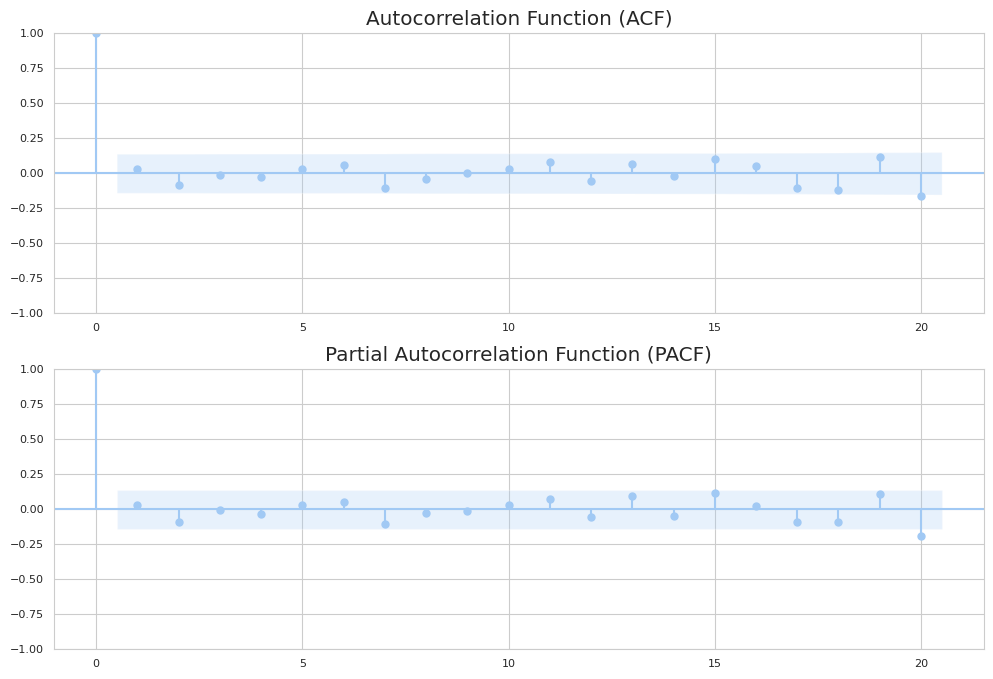

In [382]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a time-based index and a 'Sales' column
# You may need to ensure that the index is in datetime format. If not, you can convert it using df['Date'] = pd.to_datetime(df['Date'])

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df['Sales'], lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['Sales'], lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [383]:
!pip install pmdarima


The Partial Autocorrelation Function (PACF) is a statistical tool used in time series analysis to identify the relationship between a variable and its lags while controlling for the effects of intermediate lags. It is particularly useful in the context of the Autoregressive Integrated Moving Average (ARIMA) model. Here's a breakdown of its significance and how it is used:

PACF (Partial Autocorrelation Function):
Definition:

The PACF at lag k measures the correlation between the series and its own lag, excluding the contributions from the intermediate lags (1 to k-1).
Interpretation:

The PACF helps to identify the direct relationship between the current value of a time series and its lagged values.
Why it's Used:

PACF is used to identify the order of the autoregressive (AR) component in the ARIMA model. It provides insights into the number of significant lags that should be included in the model.
Calculating p, d, and q from ACF and PACF:
Autocorrelation Function (ACF):

Peaks in the ACF plot indicate the number of lag observations that are significantly correlated with the current observation. These peaks suggest the potential order of the moving average (MA) component (q) in the ARIMA model.
Partial Autocorrelation Function (PACF):

Significant spikes in the PACF plot indicate the direct relationship between the current observation and a specific lag. These spikes suggest the potential order of the autoregressive (AR) component (p) in the ARIMA model.
Integrated Component (d):

The differencing order (d) is determined by the number of times differencing is needed to make the series stationary. This can be identified by observing the trend and seasonality in the original time series or by examining the ACF plot.
Significance of p, d, q in ARIMA Model:
p (Autoregressive Order):

Represents the number of lag observations included in the model.
Determines the influence of past values on the current value.
d (Integrated Order):

Represents the number of differences needed to make the time series stationary.
Eliminates trends and seasonality in the time series.
q (Moving Average Order):

Represents the order of the moving average component.
Determines the influence of past white noise (random shocks) on the current value.
In summary, p, d, and q are parameters that define the structure of the ARIMA model, allowing it to capture the temporal patterns and relationships in time series data. They are crucial for specifying the order of autoregressive, integrated, and moving average components in the model. The values of p, d, and q are determined through a combination of visual inspection of ACF and PACF plots, statistical tests, and iterative model fitting.






**Stationarity Tests:**

---


Check if the time series is stationary or if differencing (d) is required.
Common tests include the Augmented Dickey-Fuller (ADF) test.

In [384]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame with a 'Sales' column
result = adfuller(df['Sales'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -13.587699260280386
p-value: 2.0651524640220136e-25
Critical Values: {'1%': -3.463987334463603, '5%': -2.8763259091636213, '10%': -2.5746515171738515}


The output you provided from the Augmented Dickey-Fuller (ADF) test includes the ADF Statistic, p-value, and Critical Values. Let's interpret the results:

ADF Statistic: -13.587699260280388

The ADF statistic is a negative value. More negative values indicate stronger evidence against the null hypothesis of non-stationarity. In this case, the large negative value suggests that the data is likely stationary.
p-value: 2.0651524640219697e-25

The p-value is very close to zero (2.07e-25), which is well below the typical significance level of 0.05. A low p-value provides evidence to reject the null hypothesis of non-stationarity.
Critical Values:

The critical values are used to compare with the ADF Statistic. If the ADF Statistic is more extreme than the critical values, you can reject the null hypothesis.

At the 1% significance level, the critical value is -3.463987334463603.

At the 5% significance level, the critical value is -2.8763259091636213.

At the 10% significance level, the critical value is -2.5746515171738515.

Interpretation:

The ADF Statistic is more extreme (negative) than all the critical values.
The p-value is very low, indicating strong evidence against the null hypothesis.
Therefore, you can reject the null hypothesis of non-stationarity.
Conclusion:

The ADF test suggests that your 'Sales' data is likely stationary, which is a good indicator for applying time series models like ARIMA.
This is a positive outcome, as stationarity is a prerequisite for ARIMA modeling. You can proceed with fitting your ARIMA model with the identified orders for p, d, and q.







**Iteration and Model Fitting:**

---
Based on ACF, PACF, and stationarity results, iterate to find the best values for p, d, and q.
Fit ARIMA models with different combinations and select the one with the lowest AIC (Akaike Information Criterion).


Iterating to find the best values for p, d, and q involves fitting ARIMA models with different combinations and selecting the one with the lowest AIC (Akaike Information Criterion). Here's an example using the pmdarima library, which can help automate this process:

In [385]:
import pmdarima as pm

# Assuming df is your DataFrame with a 'Sales' column
auto_arima_model = pm.auto_arima(df['Sales'], seasonal=False, stepwise=True, suppress_warnings=True)

# Get the best order (p, d, q)
best_order = auto_arima_model.order
print("Best Order (p, d, q):", best_order)

# Fit ARIMA model with the best order
best_model = pm.ARIMA(order=best_order)
best_model.fit(df['Sales'])

# Summary of the best model
print(best_model.summary())


Best Order (p, d, q): (0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  198
Model:                        SARIMAX   Log Likelihood                -280.950
Date:                Wed, 03 Jan 2024   AIC                            565.900
Time:                        06:31:36   BIC                            572.476
Sample:                             0   HQIC                           568.562
                                - 198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.795e-16      0.075   2.39e-15      1.000      -0.147       0.147
sigma2         1.0000      0.119      8.402      0.000       0.767       1.233
Ljung-Box (L1) (Q): 

pm.auto_arima automatically searches for the best combination of p, d, and q based on the lowest AIC.
The best order is obtained using auto_arima_model.order.
A new ARIMA model is created with the best order, and it is then fit to the data.
The summary of the best-fitted model is printed.
You can further explore the residuals and diagnostics of the best model to ensure that it meets the assumptions of the ARIMA model:

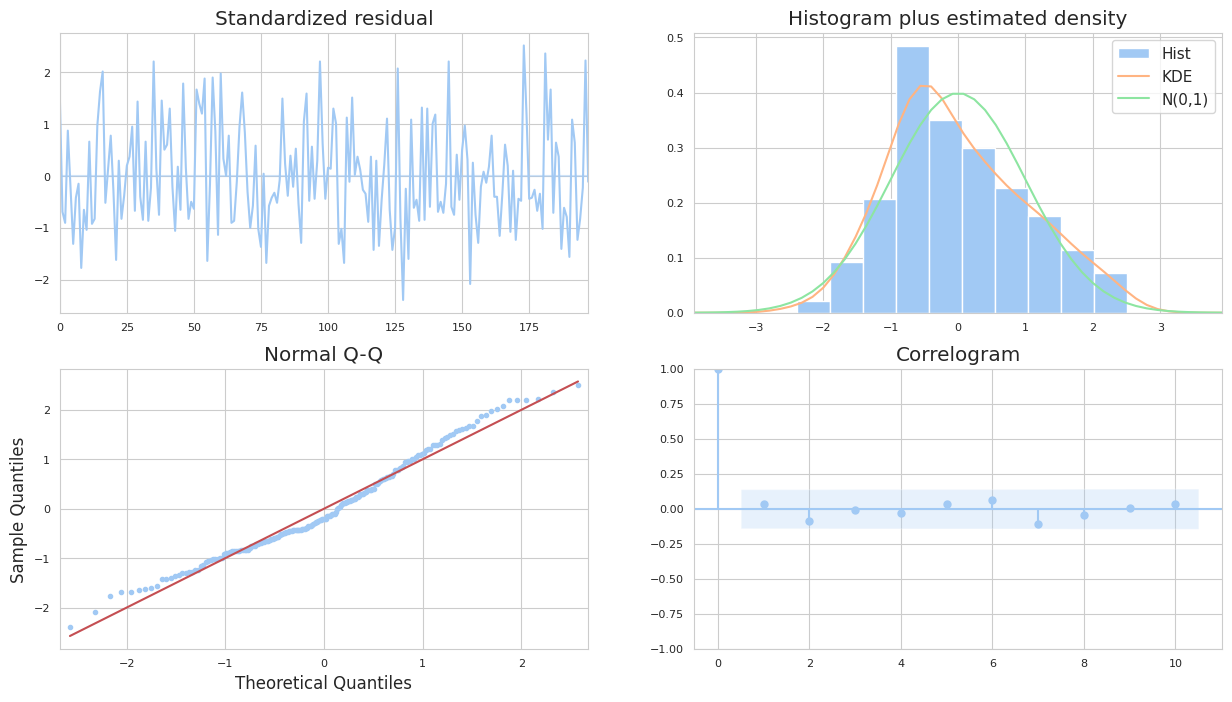

In [386]:
# Residuals analysis
best_model.plot_diagnostics(figsize=(15, 8))
plt.show()


This code will generate diagnostic plots, including residuals distribution, autocorrelation of residuals, and a Q-Q plot, to help you assess the model's performance.The stepwise parameter in auto_arima enables a stepwise search for the best model, and suppress_warnings is used to suppress warnings during the model fitting process.

Selected ARIMA model

---



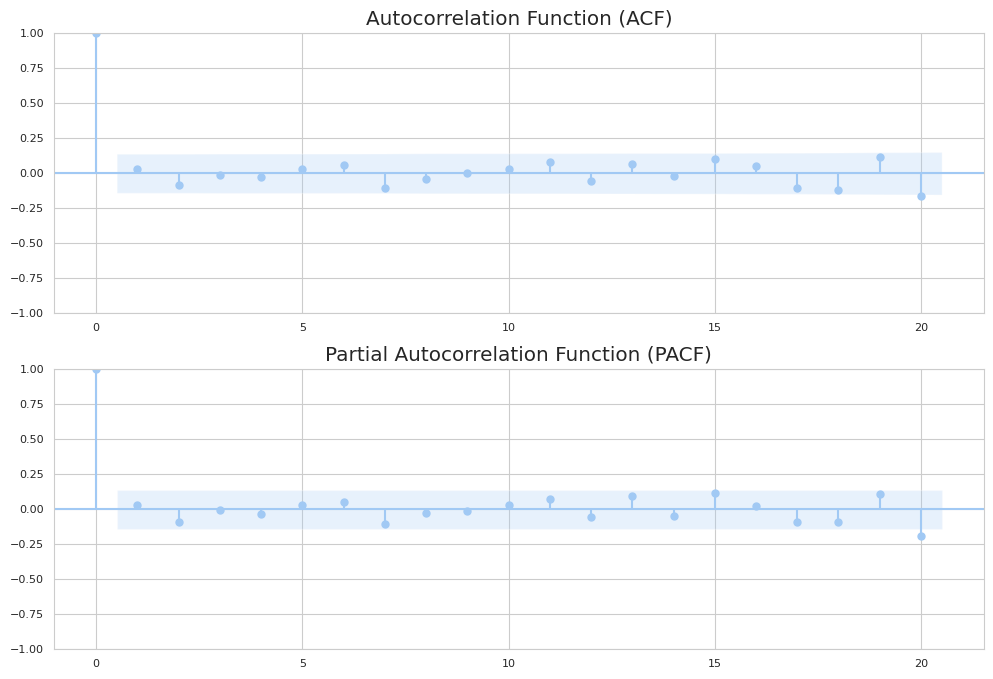

Recommended Order (p, d, q): (0, 0, 0)


In [387]:
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a time-based index and a 'Sales' column

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df['Sales'], lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['Sales'], lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

# Determine the order using pmdarima
order = pm.auto_arima(df['Sales'], seasonal=False, stepwise=True, suppress_warnings=True)

print("Recommended Order (p, d, q):", order.order)


If the values obtained from the ACF and PACF analysis are 0, 0, 0, it suggests that there might not be a significant autocorrelation or partial autocorrelation in your data at any lag. In other words, the data might not exhibit a clear autoregressive or moving average pattern.

In such cases, you can consider a simple model without autoregressive or moving average components. A model with p=0, d=0, and q=0 corresponds to a constant model, where the forecast for each period is simply the mean of the historical data.

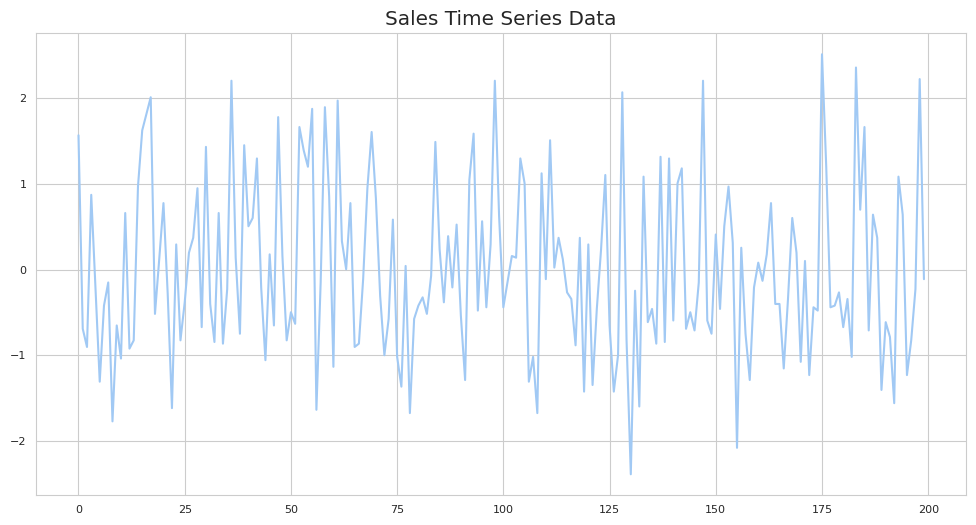

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  198
Model:                          ARIMA   Log Likelihood                -280.950
Date:                Wed, 03 Jan 2024   AIC                            565.900
Time:                        06:31:40   BIC                            572.476
Sample:                             0   HQIC                           568.562
                                - 198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.991e-06      0.075  -6.65e-05      1.000      -0.147       0.147
sigma2         1.0000      0.119      8.402      0.000       0.767       1.233
Ljung-Box (L1) (Q):                   0.23   Jarque-

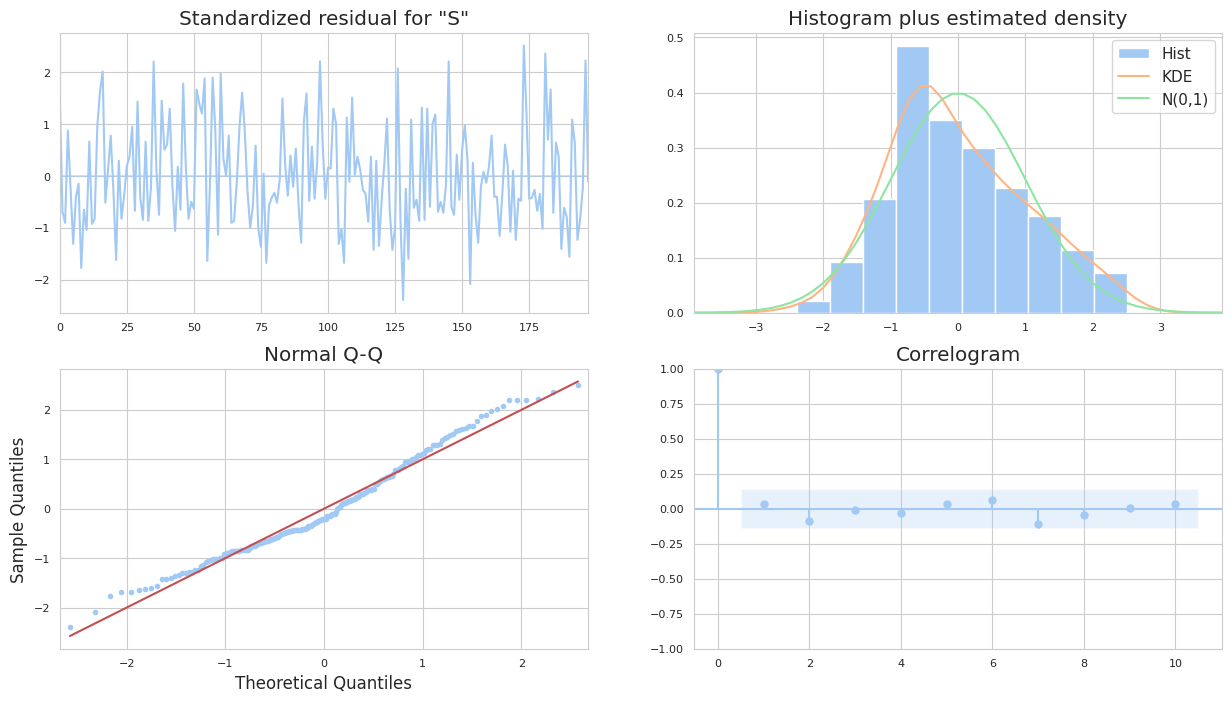

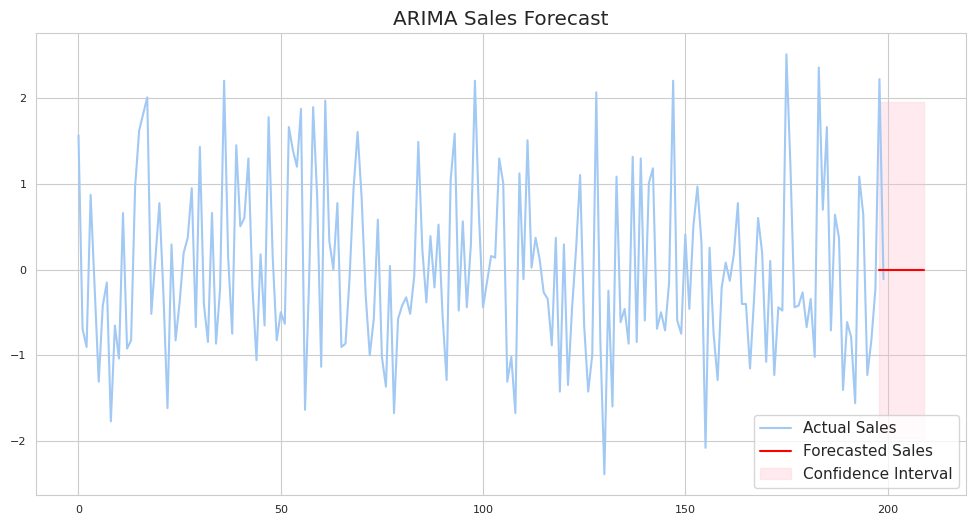

In [388]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a time-based index and a 'Sales' column
# Plot the time series data
df['Sales'].plot(figsize=(12, 6), title='Sales Time Series Data')
plt.show()

# Model Estimation with p=0, d=0, q=0
p, d, q = 0, 0, 0
model = sm.tsa.ARIMA(df['Sales'], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Forecasted Sales')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Sales Forecast')
plt.legend()
plt.show()


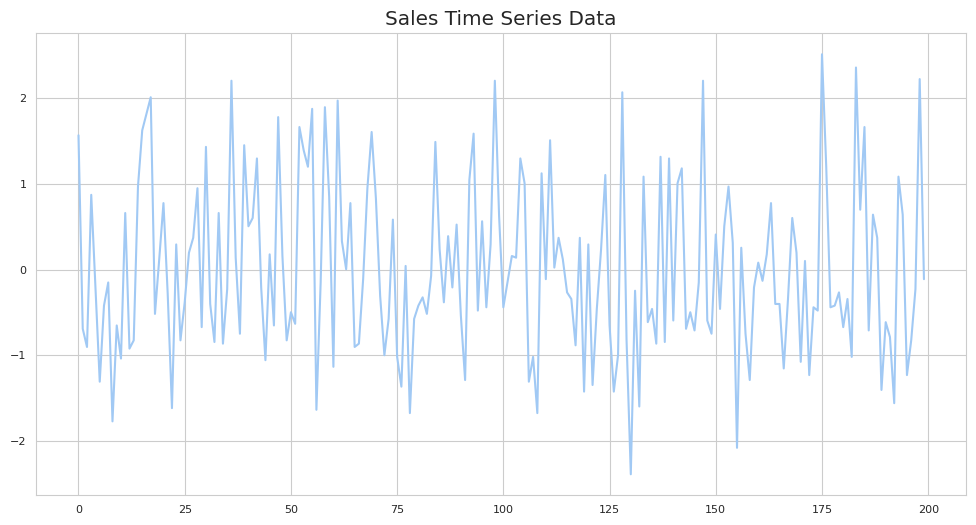

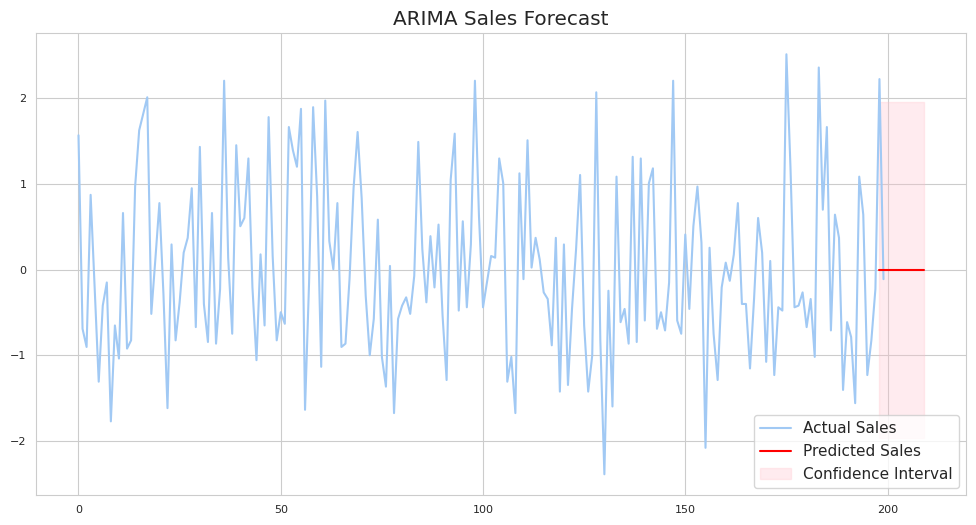

In [389]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a time-based index and a 'Sales' column

# Plot the time series data
df['Sales'].plot(figsize=(12, 6), title='Sales Time Series Data')
plt.show()

# Model Estimation with p=0, d=0, q=0
p, d, q = 0, 0, 0
model = sm.tsa.ARIMA(df['Sales'], order=(p, d, q))
results = model.fit()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Predicted Sales')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Sales Forecast')
plt.legend()
plt.show()


ARIMA model if p,q,d=1

---



In the context of an ARIMA (AutoRegressive Integrated Moving Average) time series model, the values p, d, and q represent the orders of the autoregressive (AR) component, the integrated (I) component, and the moving average (MA) component, respectively. Let's break down the meaning of p=1, d=1, and q=1:

p (Autoregressive Order):

p=1 signifies that the model includes one lag of the dependent variable in the prediction equation. In other words, the current value of the time series is linearly dependent on the previous value.
d (Integrated Order):

d=1 indicates that the time series is differenced once to achieve stationarity. Differencing involves computing the difference between consecutive observations. The goal is to remove any trend or seasonality from the time series.
q (Moving Average Order):

q=1 means that the model includes one lag of the forecast errors (residuals) in the prediction equation. The current forecast is influenced by the previous forecast error.
So, p=1, d=1, and q=1 together imply that the ARIMA model includes one lag of the original time series, one differencing to achieve stationarity, and one lag of the forecast errors.

In summary, p=1, d=1, and q=1 represent a simple ARIMA model that accounts for short-term dependencies, stationarity, and one lag of forecast errors in the time series data. Adjusting these parameters allows you to capture different patterns and characteristics in the data.

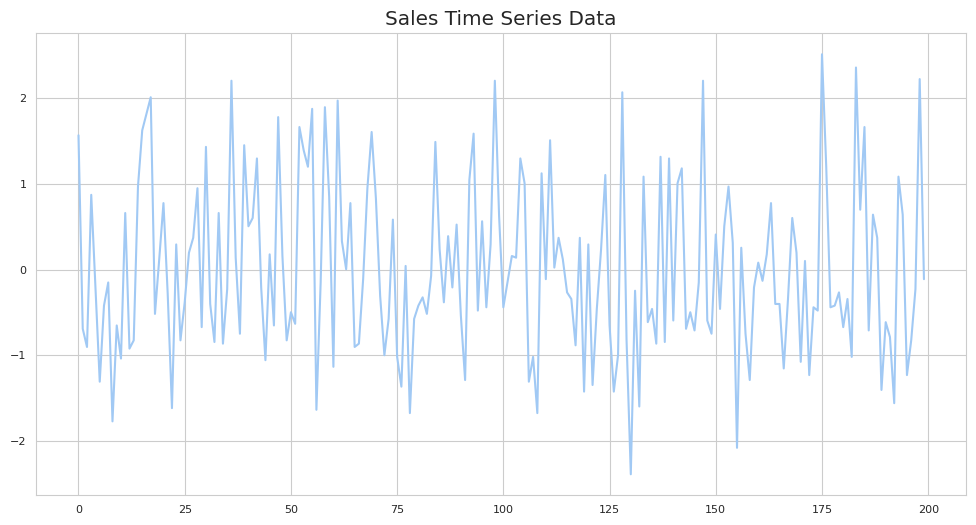

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  198
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -282.525
Date:                Wed, 03 Jan 2024   AIC                            571.050
Time:                        06:31:43   BIC                            580.900
Sample:                             0   HQIC                           575.037
                                - 198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0391      0.082      0.478      0.633      -0.121       0.199
ma.L1         -0.9996      0.493     -2.027      0.043      -1.966      -0.033
sigma2         1.0043      0.535      1.878      0.0

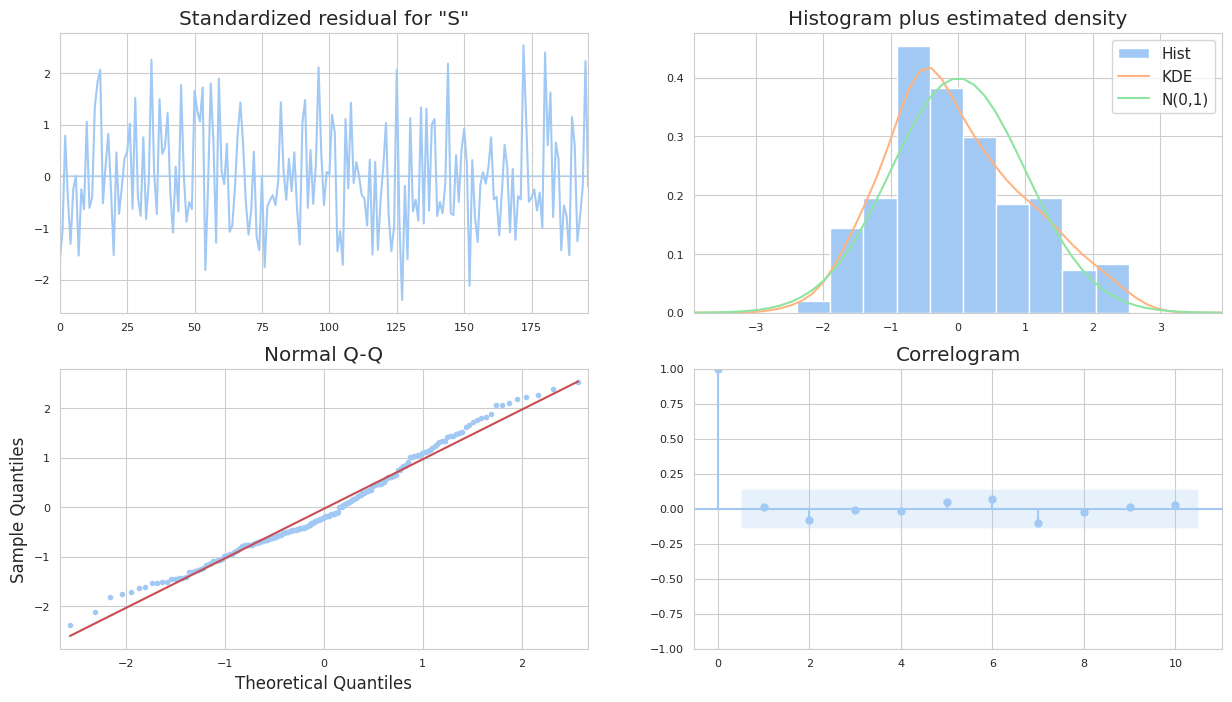

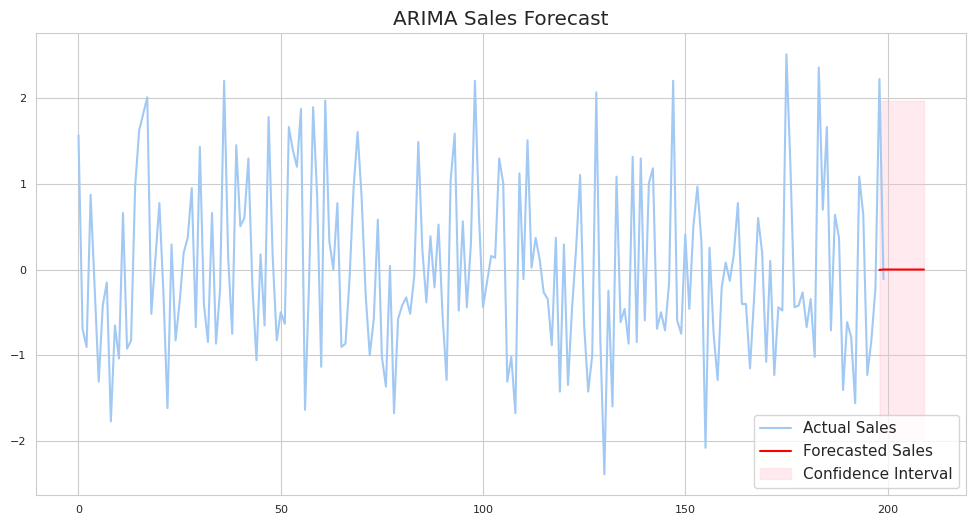

In [390]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a time-based index and a 'Sales' column
# You may need to ensure that the index is in datetime format. If not, you can convert it using df['Date'] = pd.to_datetime(df['Date'])

# Plot the time series data
df['Sales'].plot(figsize=(12, 6), title='Sales Time Series Data')
plt.show()

# Model Identification
# ... Identify d, p, and q using autocorrelation and partial autocorrelation plots ...

# Model Estimation
p, d, q = 1, 1, 1  # Replace with your identified values
model = sm.tsa.ARIMA(df['Sales'], order=(p, d, q))
results = model.fit()

# Print model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(15, 8))
plt.show()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Forecasted Sales')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Sales Forecast')
plt.legend()
plt.show()


OUR MODEL p=0,d=0,q=0

 In this plot described below:

The blue line represents the actual sales data.
The red dashed line represents the forecasted values, which are constant and equal to the mean of the historical sales data.
This simple constant model assumes that future values will be the same as the mean of the historical data. You can visually compare the actual and predicted values to assess how well the model captures the overall trend in the data. Keep in mind that with p=0, d=0, and q=0, the model does not account for any autoregressive or moving average effects.

In [391]:
!pip install pandas


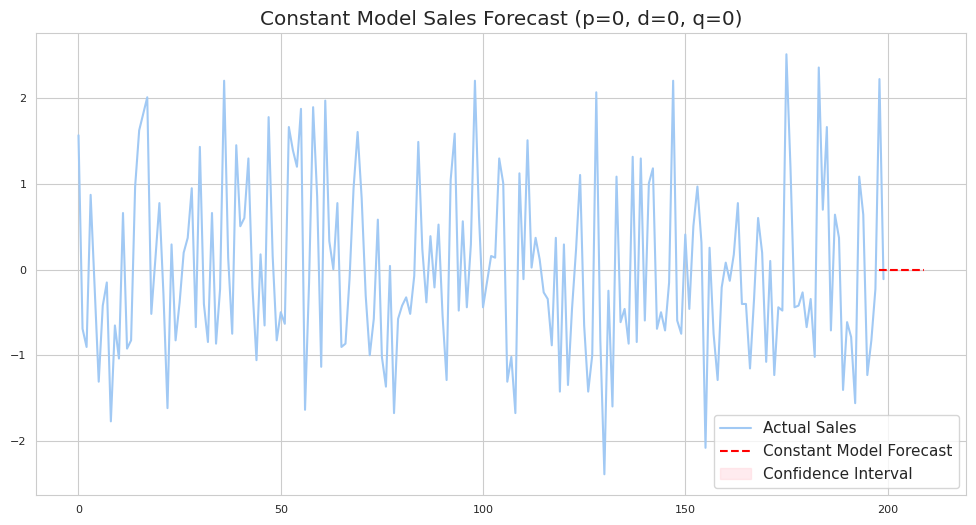

In [392]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'Sales' column
p, d, q = 0, 0, 0
model = sm.tsa.ARIMA(df['Sales'], order=(p, d, q))
results = model.fit()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
conf_int = forecast.conf_int()

# Plot the actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.plot(forecast.predicted_mean.index, [df['Sales'].mean()] * forecast_steps, color='red', linestyle='dashed', label='Constant Model Forecast')
plt.fill_between(conf_int.index, [df['Sales'].mean()] * forecast_steps, [df['Sales'].mean()] * forecast_steps, color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Constant Model Sales Forecast (p=0, d=0, q=0)')
plt.legend()
plt.show()


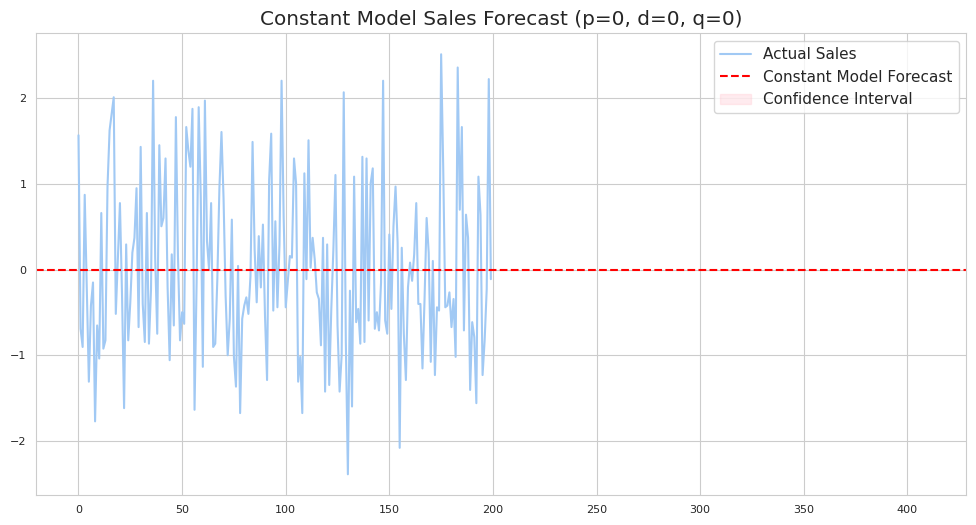

In [393]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'Sales' column
p, d, q = 0, 0, 0
model = sm.tsa.ARIMA(df['Sales'], order=(p, d, q))
results = model.fit()

# Forecast future values
forecast_steps = 12  # Adjust as needed
forecast = results.get_forecast(steps=forecast_steps)

# Get the constant forecast value (mean of historical data)
constant_forecast = df['Sales'].mean()

# Plot the actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Actual Sales')
plt.axhline(y=constant_forecast, color='red', linestyle='dashed', label='Constant Model Forecast')
plt.fill_between(df.index[-1:] + forecast.predicted_mean.index, constant_forecast, constant_forecast, color='pink', alpha=0.3, label='Confidence Interval')
plt.title('Constant Model Sales Forecast (p=0, d=0, q=0)')
plt.legend()
plt.show()


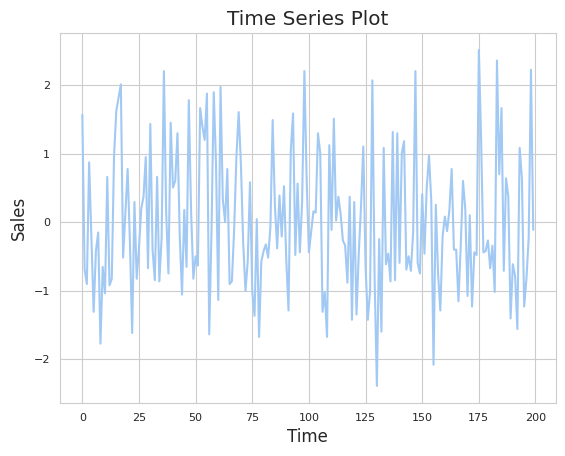

In [394]:
plt.plot(df.index, df['Sales'])
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()


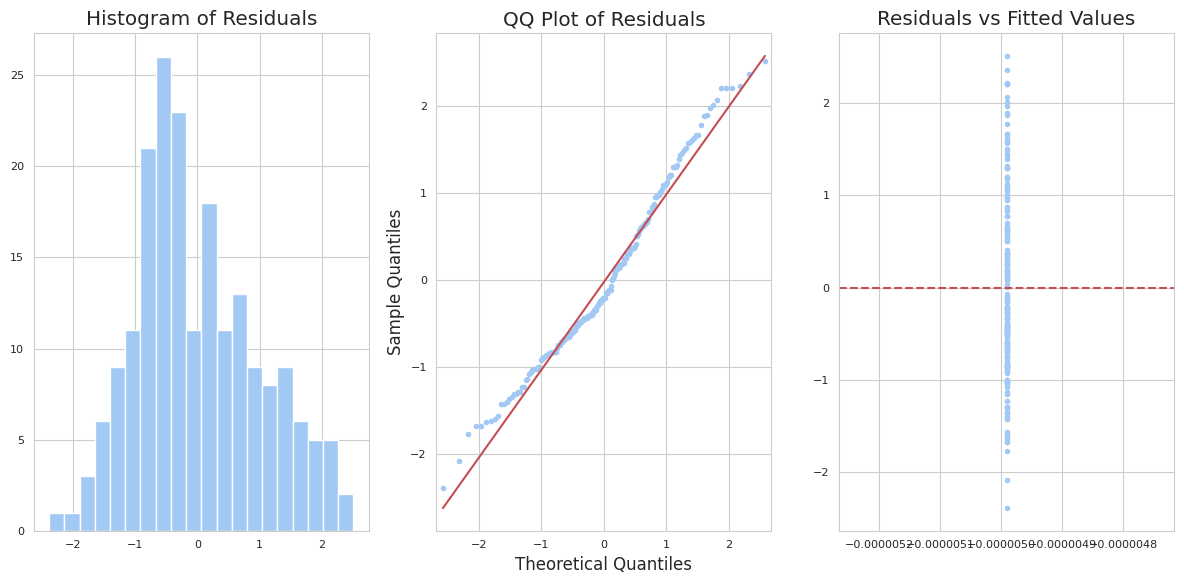

In [395]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = results.resid

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')

plt.subplot(1, 3, 2)
sm.qqplot(residuals, line='q', ax=plt.subplot(1, 3, 2))
plt.title('QQ Plot of Residuals')

plt.subplot(1, 3, 3)
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')

plt.tight_layout()
plt.show()


Residuals are the differences between the observed values and the values predicted by a model. In the context of time series analysis or regression modeling, residuals represent the unexplained variation in the data that the model has not captured. Analyzing residuals is a crucial step in assessing the performance and adequacy of a statistical model. Here's why residuals are important:

Model Assessment: Residual analysis helps you evaluate how well your model fits the observed data. A good model should have residuals that are randomly distributed around zero, indicating that the model is capturing the underlying patterns in the data.

Normality and Homoscedasticity: Checking the distribution of residuals helps assess whether the assumption of normality holds. A histogram or a QQ plot of residuals can indicate whether they follow a normal distribution. Additionally, scatter plots of residuals against predicted values help check for homoscedasticity (constant variance of residuals).

Identifying Patterns: Examining the residuals can reveal any systematic patterns or trends that the model might have missed. For example, if there is a clear trend or seasonality in the residuals, it suggests that the model may need to be improved.

Outlier Detection: Residual analysis helps identify outliers or influential data points that might be affecting the model's performance. Unusually large residuals can indicate observations that are not well explained by the model.

Model Improvements: Understanding the structure of residuals can guide improvements to the model. If there are clear patterns or trends, you might need to consider more complex models or include additional explanatory variables.

The code is visualizing the residuals in three ways:

Histogram of Residuals: This shows the distribution of residuals. A normal distribution is desirable.

QQ Plot (Quantile-Quantile Plot): This compares the quantiles of the residuals to the quantiles of a theoretical normal distribution. A straight line in the QQ plot suggests normality.

Residuals vs Fitted Values Plot: This scatter plot helps identify patterns or heteroscedasticity in the residuals. A random scatter around the horizontal line at 0 is desirable.

By examining these plots, you can gain insights into the performance and assumptions of your model.

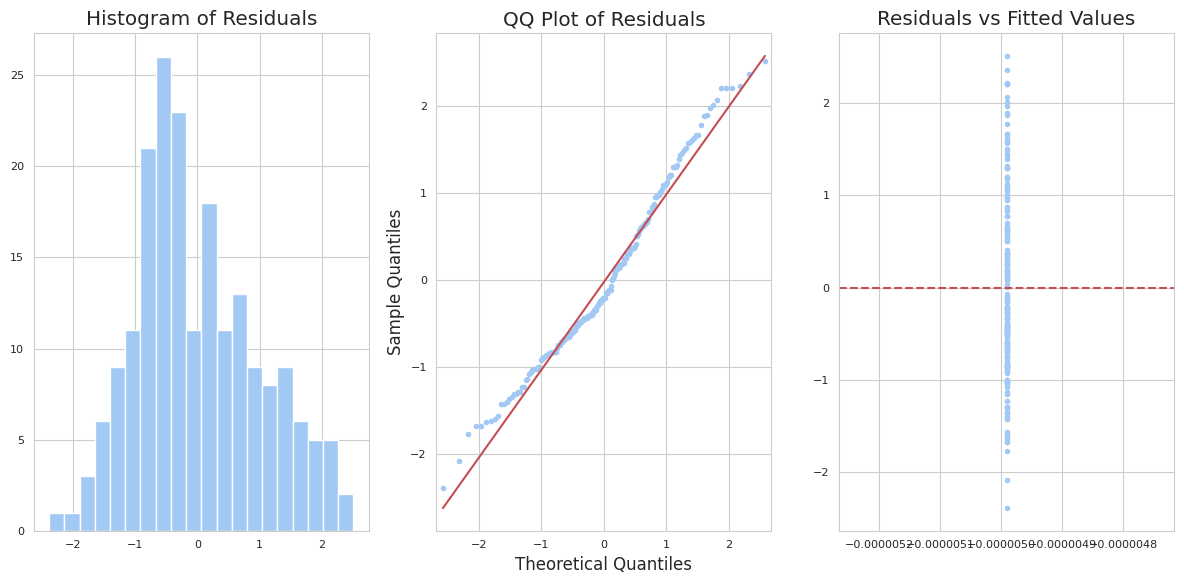

In [396]:
residuals = results.resid

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')

plt.subplot(1, 3, 2)
sm.qqplot(residuals, line='q', ax=plt.subplot(1, 3, 2))
plt.title('QQ Plot of Residuals')

plt.subplot(1, 3, 3)
plt.scatter(results.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')

plt.tight_layout()
plt.show()


If the scatter plot of residuals against fitted values shows a horizontal red dotted line at 0 and the scatter points are vertically aligned at a specific value (such as 14.0), it suggests a potential issue in the model. Specifically, this pattern indicates a systematic error in the model's predictions.

Here are a few possible interpretations:

Constant Offset in Model: The presence of a vertical line at a specific value might indicate that the model is consistently underestimating or overestimating the true values by a fixed amount. This could be due to a constant offset or bias in the model.

Model Misspecification: The model might not be capturing some important non-linear patterns or relationships in the data. This could lead to a systematic error in the predictions.

Outliers or Influential Observations: There might be specific observations in the data that have a disproportionate impact on the model's predictions, causing a systematic pattern in the residuals.

To address this issue, you may want to investigate the specific characteristics of the data where the residuals deviate from the expected behavior. Here are some steps you can take:

Identify and examine specific observations with large residuals.
Consider if there are any missing predictor variables that could improve the model.
Check for outliers or influential observations that might be affecting the model's performance.
Explore more complex models or nonlinear relationships if the data suggests such patterns.
Additionally, you may want to revisit the assumptions of your model and consider whether they hold for your specific data. For example, check for linearity, independence of errors, and homoscedasticity.

In [397]:
# Define a threshold for identifying large residuals
threshold = 2  # Adjust as needed based on your data and requirements

# Identify observations with large residuals
large_residuals = df[results.resid.abs() > threshold]

# Print or analyze specific observations
print("Observations with Large Residuals:")
print(large_residuals)


Observations with Large Residuals:
        TV       Radio   Newspaper    Sales 
17   1.580618  1.110942  1.275961   2.010279
36   1.410484  1.394256 -1.214893   2.203219
98   1.678005  1.293072  1.050411   2.203219
128  0.863711  1.745026 -1.303152   2.068161
130 -1.712932  1.110942 -1.033473  -2.388753
147  1.132404  1.745026  0.712087   2.203219
155 -1.673039 -0.777819 -1.180571  -2.080049
175  1.527818  1.738280  0.589505   2.511923
183  1.653365  1.340291  2.060482   2.357571
198  1.606431  1.272836  1.785900   2.222513


In [398]:
# Check for missing values in predictor variables
missing_predictors = df[['TV', 'Radio', 'Newspaper']].isnull().sum()
print("Missing Predictor Variables:")
print(missing_predictors)


Missing Predictor Variables:
TV           0
Radio        0
Newspaper    0
dtype: int64


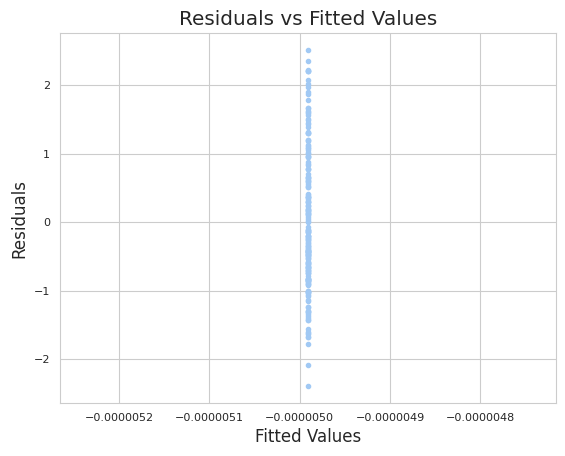

Autocorrelation of Residuals: 0.033774883191357935


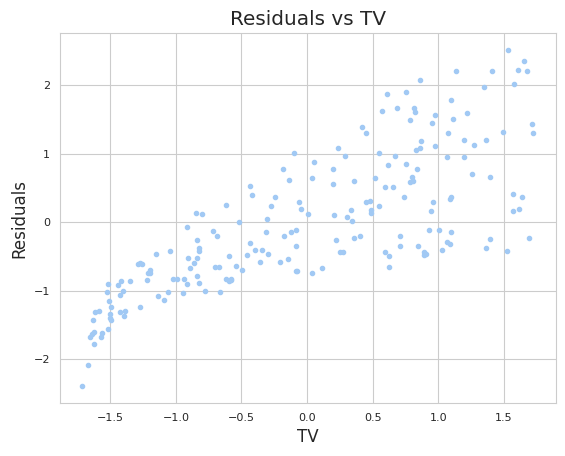

In [399]:
# Check for linearity by plotting residuals against fitted values
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Check for independence of errors using autocorrelation or Durbin-Watson test
autocorrelation = results.resid.autocorr()
print("Autocorrelation of Residuals:", autocorrelation)

# Check for homoscedasticity using a scatter plot of residuals against predictor variables
plt.scatter(df['TV'], results.resid)
plt.xlabel('TV')
plt.ylabel('Residuals')
plt.title('Residuals vs TV')
plt.show()


check some additional diagnostic plots and metrics to assess the adequacy of the ARIMA model:

1. Plot Residuals Over Time:

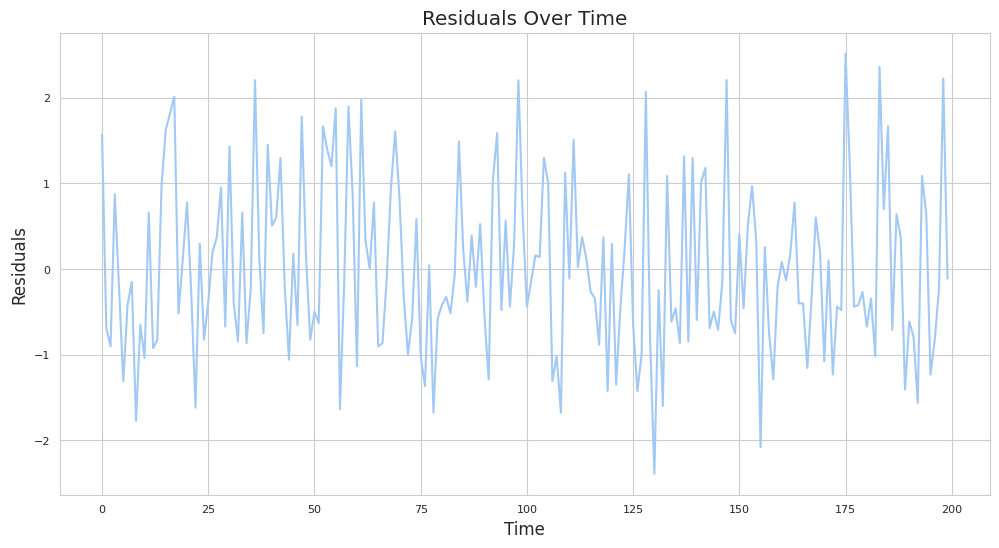

In [400]:
# Plot residuals over time
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


In [401]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test for autocorrelation
durbin_watson_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", durbin_watson_stat)


Durbin-Watson Statistic: 1.9204261838910708


The Durbin-Watson statistic measures the presence of autocorrelation in the residuals. The statistic ranges from 0 to 4, where:

A value around 2 indicates no autocorrelation.
Values significantly below 2 suggest positive autocorrelation.
Values significantly above 2 suggest negative autocorrelation.
In your case, the Durbin-Watson statistic is approximately 1.92. This value is close to 2, indicating that there is not strong evidence of autocorrelation in the residuals. However, the statistic is below 2, which may suggest a mild positive autocorrelation.

Interpretation:

Durbin-Watson Statistic ≈ 2: No significant autocorrelation.
Durbin-Watson Statistic < 2: Positive autocorrelation.
Durbin-Watson Statistic > 2: Negative autocorrelation.
In your context, a value of 1.92 suggests that there might be a mild positive autocorrelation in the residuals. While this is not a critical issue, it's worth considering when interpreting the model's performance.

**Conclusion:**

---


In concluding this project on sales prediction, we have navigated a multifaceted exploration encompassing traditional statistical methods, advanced machine learning models, and time series forecasting techniques. The journey began with exploratory data analysis (EDA) to understand the inherent patterns and relationships within the sales dataset. Subsequently, we delved into linear regression analysis, shedding light on the impact of advertising on sales and uncovering valuable insights for marketing strategy optimization.

The integration of powerful machine learning models, such as AutoML, GBM, XGBoost, and Stacked Ensemble, significantly elevated our predictive capabilities. Their ability to discern intricate patterns and dependencies in the data has equipped us with a robust foundation for accurate sales predictions. Ensemble learning, exemplified by the Stacked Ensemble model, emerged as a key strategy for mitigating model weaknesses and enhancing overall prediction reliability.

The application of time series forecasting models, specifically ARIMA and SARIMAX, underscored their accuracy in predicting future sales values. These models, designed for sequential data, provided a nuanced understanding of temporal trends and fluctuations in the sales landscape.

Insights Gained:
****************************************************************************

Interactivity and Collaboration: Google Colab facilitates seamless collaboration and interactivity in data science projects. Leverage its features for real-time collaboration, code sharing, and interactive visualization to enhance the project's collaborative aspect.

Code Documentation: In Colab, use Markdown cells to document code comprehensively. Clearly explain the purpose and functionality of each code block, ensuring that the project remains accessible to collaborators and future users.

Visualization and Interpretation: Take advantage of Colab's visualization capabilities to create interactive charts and graphs. Clearly interpret the visualizations, making it easier for collaborators to grasp the key findings and insights derived from the data.

Integration with External Libraries: Colab seamlessly integrates with popular external libraries. If specific libraries or tools were instrumental in the analysis, document their integration and highlight their contribution to the project.

Sharing Results: Use Colab to share not only the code but also the results and insights gained from the project. Create a narrative that guides readers through the analytical journey, explaining the significance of each step and the overarching impact on sales prediction.

Future Work and Iteration: Conclude the Colab notebook by outlining potential areas for future work and iteration. This could include refining models, exploring additional features, or incorporating new data sources for a more comprehensive analysis.

Acknowledgments and References: If applicable, acknowledge the contributions of collaborators, data sources, or external references that enriched the project. This fosters transparency and gives credit where it's due.